# Analysis of Candlestick Data using Unsupervised Learning like Clustering

Install Squarify to create treemaps for visualizing hierarchical data

In [54]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Install mplfinance, It provides a convenient interface for creating various types of financial plots, including candlestick charts, OHLC (open-high-low-close) charts, and more.

In [9]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import necessary Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To suppress unnecessary warnings in the script, you can import the warnings module and filter out specific types of warnings.

In [114]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Read the dataset

In [115]:
data = pd.read_csv(f"D:\projects\optAlpha_Assignment\Assignment2\s1 data\s1.csv")

In [116]:
data.head()

date      time    open    high     low   close  volume  open_interest
0  2017-01-02  09:15:00  100.00  100.28  100.00  100.02  7000.0       100000.0
1  2017-01-02  09:16:00  100.02  100.07  100.02  100.06  3509.0       101212.0
2  2017-01-02  09:17:00  100.05  100.06   99.70   99.73  5105.0       101212.0
3  2017-01-02  09:18:00   99.71   99.79   99.63   99.79  4959.0       101212.0
4  2017-01-02  09:19:00   99.78   99.82   99.69   99.70  2398.0       102480.0

Check if there are any NULL values

In [117]:
data.isnull().any()

date             False
time             False
open             False
high             False
low              False
close            False
volume           False
open_interest    False
dtype: bool

Check the Data Type of Each column

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673384 entries, 0 to 673383
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           673384 non-null  object 
 1   time           673384 non-null  object 
 2   open           673384 non-null  float64
 3   high           673384 non-null  float64
 4   low            673384 non-null  float64
 5   close          673384 non-null  float64
 6   volume         673384 non-null  float64
 7   open_interest  673384 non-null  float64
dtypes: float64(6), object(2)
memory usage: 41.1+ MB


First convert the **date** column to datetime objects and the **time** column to time objects in a pandas DataFrame. 
Then combine these two columns into a single **DateTime** column by adding the time as a timedelta to the date. 
Finally, it drops the original **date** and **time** columns, leaving the DataFrame with the consolidated **DateTime** column.

In [119]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

df['DateTime'] = df['date'] + pd.to_timedelta(df['time'].astype(str))
df = df.drop(['date', 'time'], axis=1)

set DateTime as index

In [120]:
df.set_index('DateTime', inplace = True)

Now, this line of code adds a new column named **color** to the DataFrame. Using a lambda function applied row-wise (`axis = 1`), it assigns the value 'green' to the **color** column if the difference between the 'close' and 'open' prices for that row is positive, indicating a price increase. Conversely, it assigns 'red' if the difference is non-positive, indicating either a price decrease or no change.

In [121]:
df['color'] = df.apply(lambda row: 'green' if (row['close']-row['open'])>0 else 'red', axis = 1)

see whether the color column is being updated or not

In [122]:
df.head()

open    high     low   close  volume  open_interest  \
DateTime                                                                     
2017-01-02 09:15:00  100.00  100.28  100.00  100.02  7000.0       100000.0   
2017-01-02 09:16:00  100.02  100.07  100.02  100.06  3509.0       101212.0   
2017-01-02 09:17:00  100.05  100.06   99.70   99.73  5105.0       101212.0   
2017-01-02 09:18:00   99.71   99.79   99.63   99.79  4959.0       101212.0   
2017-01-02 09:19:00   99.78   99.82   99.69   99.70  2398.0       102480.0   

                     color  
DateTime                    
2017-01-02 09:15:00  green  
2017-01-02 09:16:00  green  
2017-01-02 09:17:00    red  
2017-01-02 09:18:00  green  
2017-01-02 09:19:00    red

## Normalization

Import the MinMaxScaler and StandardScaler classes from the scikit-learn library, which are used for scaling numerical features in machine learning models. 

- The **MinMaxScaler** scales features to a specified range (usually between 0 and 1).
- while the **StandardScaler** standardizes features by removing the mean and scaling to unit variance. 

These scalers are commonly used for preprocessing data before training machine learning models to ensure that all features have similar scales and distributions.

In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Let us use **MinMaxScaler** for Normalizing the Data

In [124]:
#Normalization
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume', 'open_interest']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume', 'open_interest']])

# Exploratory Data Analysis

Generate a box plot using seaborn (`sns`) and matplotlib (`plt`) libraries. The `df[['open', 'high', 'low', 'close']]` selects columns containing price data from the DataFrame. A **box plot** is created for each selected column, representing the distribution of prices. The `plt.title`, `plt.xlabel`, and `plt.ylabel` functions set the title, x-axis label, and y-axis label for the plot, respectively. Finally, `plt.show()` displays the plot with the specified settings.

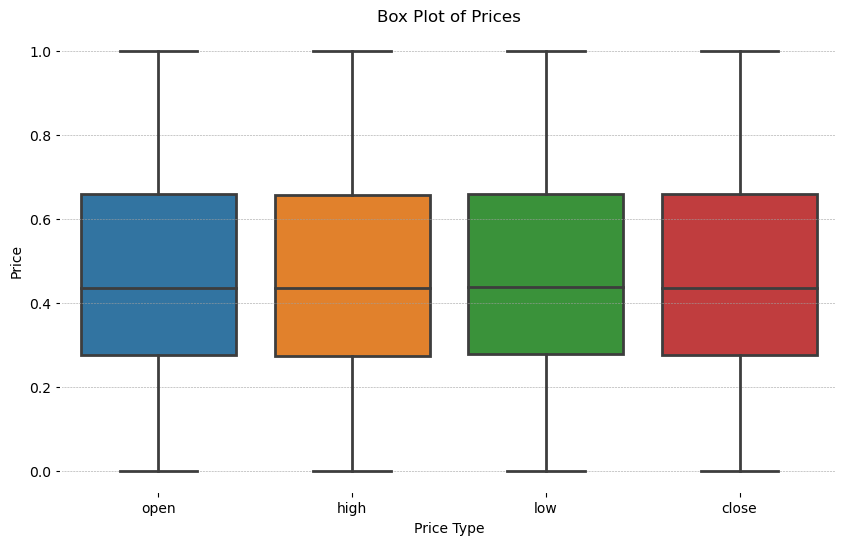

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title('Box Plot of Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

Subplots are created using `plt.subplots()` with a specified figure size. Then, a loop iterates over each feature, creating a separate subplot for each one using `plt.subplot()`. Within each subplot, seaborn's `sns.distplot()` is used to visualize the distribution of values for that feature. Finally, `plt.show()` displays all subplots together. This setup allows for a comparative analysis of the distributions of the specified features.

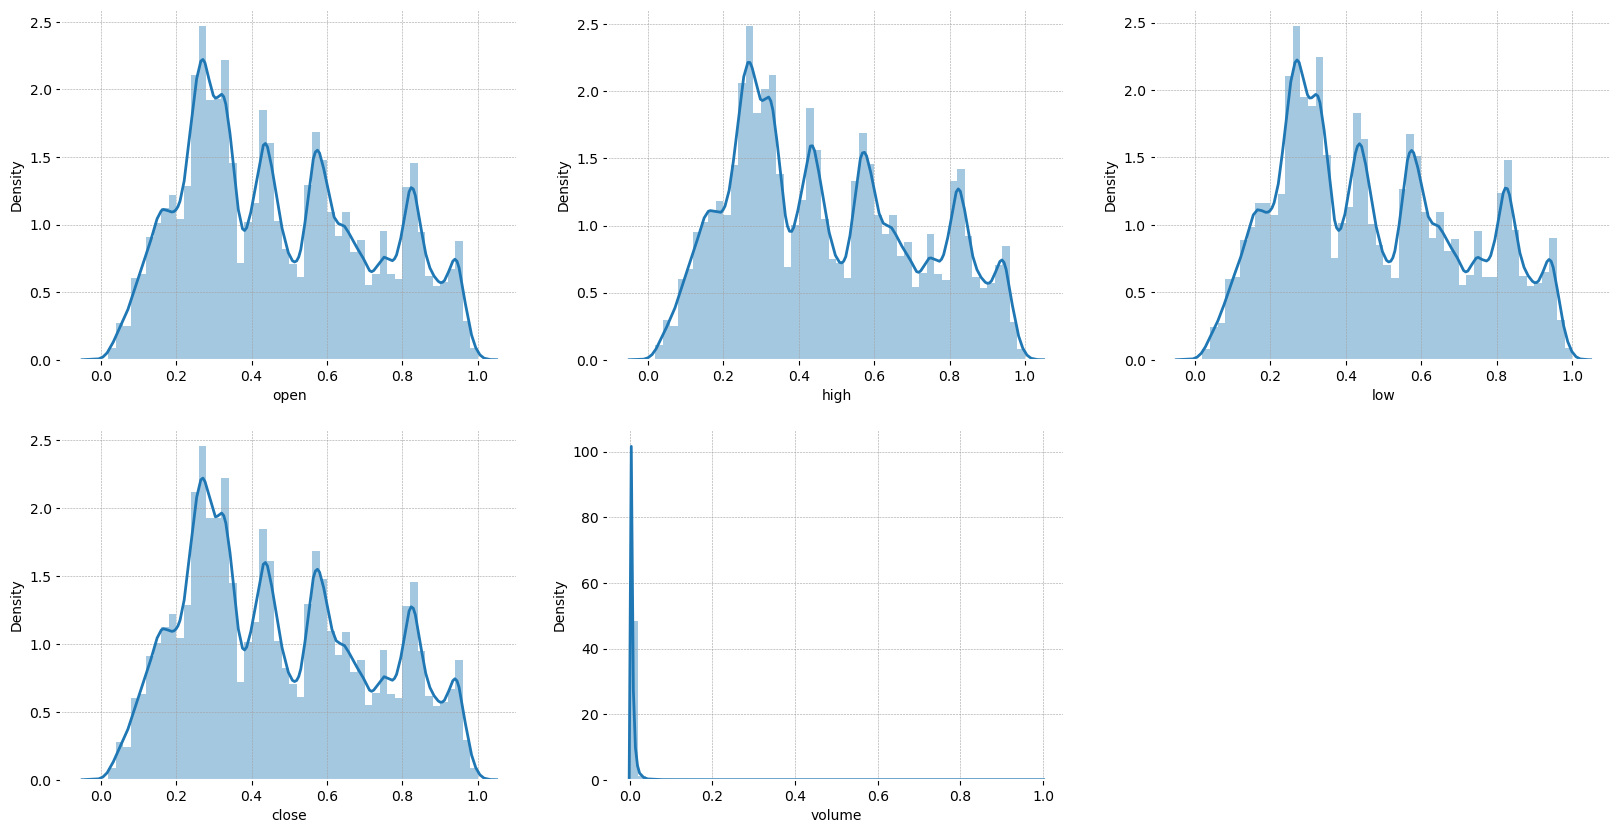

In [126]:
features = ['open', 'high', 'low', 'close', 'volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sns.distplot(df[col]) 
plt.show()

## Feature Engineering

This code snippet enhances the DataFrame by deriving date and time features from its index. It creates new columns for day, month, hour, and minute components extracted from the index, offering insights into temporal patterns within the data.

In [127]:
# 4. Date and Time Features
df['day'] = df.index.day
df['month'] = df.index.month
df['hour'] = df.index.hour
df['minute'] = df.index.minute

## Handling Outliers

This code segment handles outliers in the DataFrame by first calculating the first and third quartiles (Q1 and Q3) and the interquartile range **(IQR)** for specified columns `('open', 'high', 'low', 'close', 'volume', 'open_interest')`. 
Then, it identifies outliers using the IQR method and removes rows containing outliers. Finally, it displays the preprocessed DataFrame without outliers.

In [128]:
#Handling Outliers
Q1 = df[['open', 'high', 'low', 'close', 'volume', 'open_interest']].quantile(0.25)
Q3 = df[['open', 'high', 'low', 'close', 'volume', 'open_interest']].quantile(0.75)
IQR = Q3 - Q1

# Align the DataFrame with the quantiles
Q1_aligned, df_aligned = df.align(Q1, axis=1, copy=False)
Q3_aligned, _ = df.align(Q3, axis=1, copy=False)

# Removing outliers
df = df[~((df_aligned < (Q1_aligned - 1.5 * IQR)) | (df_aligned > (Q3_aligned + 1.5 * IQR))).any(axis=1)]

# Display the preprocessed DataFrame
df

open      high       low     close    volume  \
DateTime                                                                
2017-01-02 09:19:00  0.061962  0.059652  0.062981  0.061480  0.008166   
2017-01-02 09:23:00  0.061370  0.059004  0.062389  0.061104  0.006313   
2017-01-02 09:24:00  0.061154  0.058681  0.062335  0.061104  0.004281   
2017-01-02 09:25:00  0.061047  0.058896  0.062443  0.061319  0.005336   
2017-01-02 09:26:00  0.061370  0.058896  0.062443  0.061373  0.003845   
...                       ...       ...       ...       ...       ...   
2023-11-28 15:24:00  0.825097  0.824227  0.825795  0.825249  0.002843   
2023-11-28 15:25:00  0.825258  0.824227  0.825741  0.825195  0.004481   
2023-11-28 15:26:00  0.825258  0.824443  0.826064  0.825410  0.004458   
2023-11-28 15:27:00  0.825474  0.824497  0.826225  0.825572  0.006109   
2023-11-28 15:29:00  0.825581  0.824659  0.826225  0.825734  0.007968   

                     open_interest  color  day  month  hour  minute  
DateTime                                                             
2017-01-02 09:19:00       0.112768    red    2      1     9      19  
2017-01-02 09:23:00       0.113499    red    2      1     9      23  
2017-01-02 09:24:00       0.113499    red    2      1     9      24  
2017-01-02 09:25:00       0.114185  green    2      1     9      25  
2017-01-02 09:26:00       0.114185  green    2      1     9      26  
...                            ...    ...  ...    ...   ...     ...  
2023-11-28 15:24:00       0.101743  green   28     11    15      24  
2023-11-28 15:25:00       0.101743    red   28     11    15      25  
2023-11-28 15:26:00       0.101743  green   28     11    15      26  
2023-11-28 15:27:00       0.101934  green   28     11    15      27  
2023-11-28 15:29:00       0.101934  green   28     11    15      29  

[458789 rows x 11 columns]

In this code, a line plot of closing prices over time is generated using seaborn (`sns`) and matplotlib (`plt`). The `df.index` is set as the x-axis values, representing time, and the 'close' column is set as the y-axis values. The `plt.title` function sets the title of the plot, and `plt.show()` displays the plot with the specified settings.

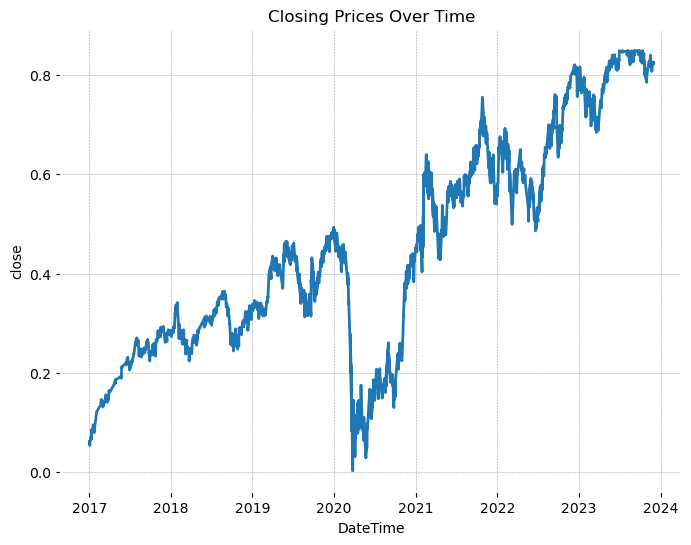

In [129]:
plt.figure(figsize = (8, 6))
sns.lineplot(df, x=df.index, y='close')
plt.title('Closing Prices Over Time')
plt.show()

This code creates a line plot visualizing the opening prices over time using seaborn (`sns`) and matplotlib (`plt`). The x-axis represents time, indicated by `df.index`, and the y-axis represents the opening prices, specified by the 'open' column of the DataFrame. The `plt.title` function sets the title of the plot, and `plt.show()` displays the plot with the specified settings.

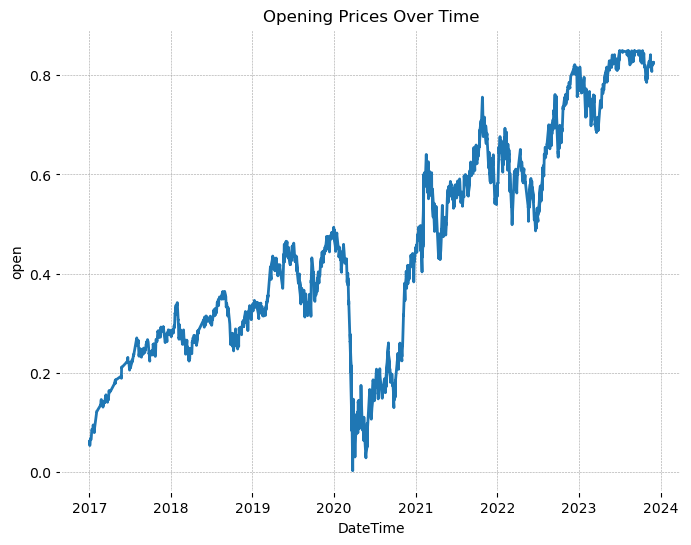

In [130]:
plt.figure(figsize = (8, 6))
sns.lineplot(df, x=df.index, y='open')
plt.title('Opening Prices Over Time')
plt.show()

In this code, a subset of the DataFrame (`df2`) containing the first 1000 rows (as the datset is large) is created. Then, a bar plot is generated using matplotlib (`plt.bar()`) to visualize the volume of trades over time. The x-axis represents dates (indexed values), the y-axis represents the volume of trades, and each bar corresponds to a specific date. The plot is displayed with a title, xlabel, and ylabel using `plt.title`, `plt.xlabel`, and `plt.ylabel`, respectively.

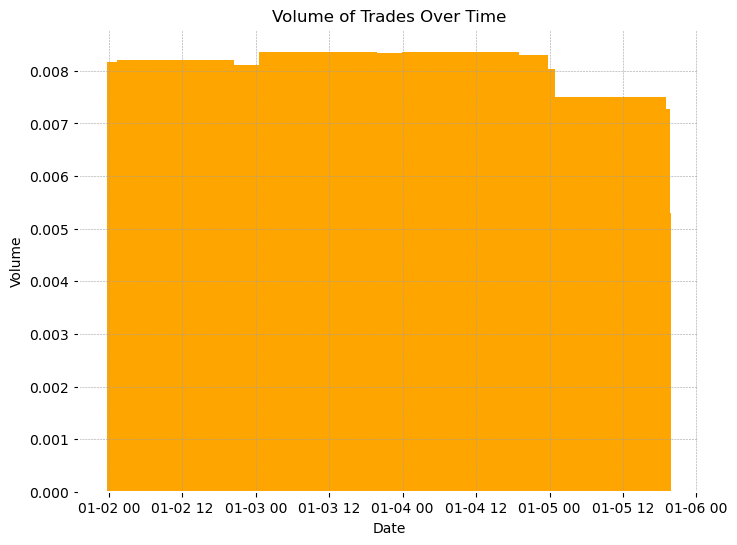

In [131]:
df2 = df.head(1000)
plt.figure(figsize=(8, 6))
plt.bar(df2.index, df2['volume'], color='orange')
plt.title('Volume of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

considering first 173384 rows

In [133]:
df = df.head(173384)

This code segment creates a **Treemap visualization** of trading volume aggregated by time intervals. Initially, the DataFrame is grouped by time intervals, summing the volumes. Then, squarify library is employed to generate the treemap plot. Each rectangle's size represents the trading volume for a specific time interval, with labels indicating the corresponding time. The plot is displayed with a title, and `plt.axis('off')` is used to hide the axes.

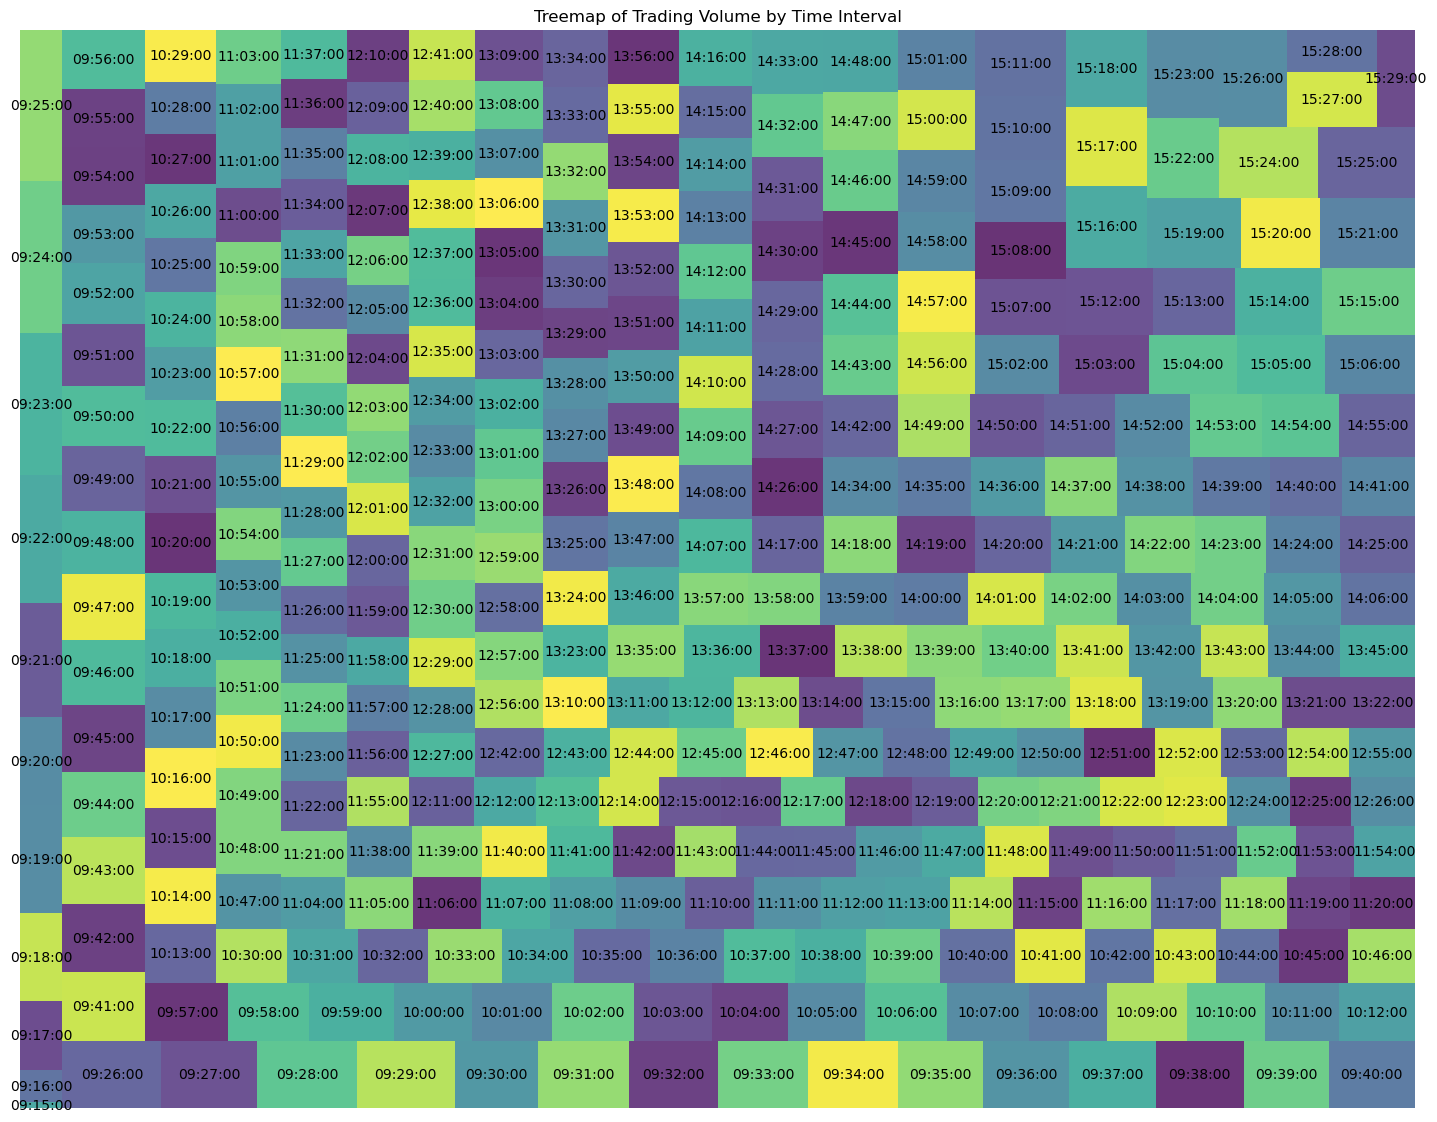

In [134]:
# Treemap
import squarify
volume_summary = df.groupby(df.index.time)['volume'].sum().reset_index()
volume_summary.columns = ['time', 'volume']
plt.figure(figsize=(18, 14))
squarify.plot(sizes=volume_summary['volume'], label=volume_summary['time'], alpha=.8)
plt.title('Treemap of Trading Volume by Time Interval')
plt.axis('off')
plt.show()

This code segment utilizes Plotly Express (`px`) to generate a **Sunburst chart** depicting trading volume aggregated by time intervals. The DataFrame is grouped by time intervals, summing the volumes. The `px.sunburst()` function is then used to create the sunburst chart, with time intervals forming the hierarchical path and volume values determining the size of each segment. The chart title is set, and `fig.show()` displays the chart.

In [135]:
# Sunburst Chart
import plotly.express as px
volume_summary = df.groupby(df.index.time)['volume'].sum().reset_index()
volume_summary.columns = ['time', 'volume']
fig = px.sunburst(volume_summary, path=['time'], values='volume', title='Sunburst Chart of Trading Volume by Time Interval')
fig.show()

This code segment creates a **Stacked bar chart** using matplotlib. The DataFrame is first grouped by time intervals, aggregating the volumes. Then, `time_summary.plot()` is called with `kind='bar'` and `stacked=True` to generate the stacked bar chart. Each bar represents the total volume of trades for a specific time interval, with different segments stacked to show the contribution of different categories (e.g., different types of trades). The chart is displayed with a title, and axis labels, and a legend is included to indicate the volume represented by each segment.

<Figure size 1000x600 with 0 Axes>

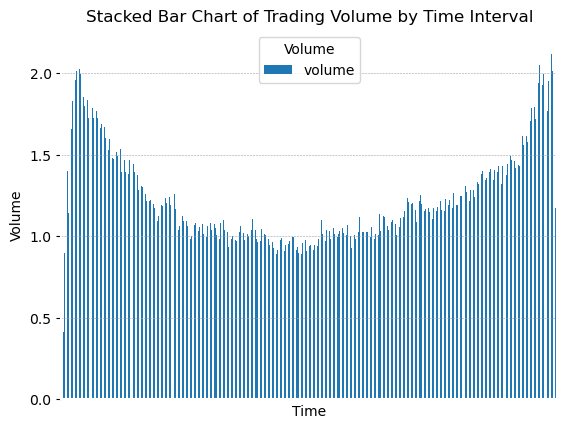

In [136]:
# Stacked Bar Chart
time_summary = df.groupby(df.index.time).sum()
plt.figure(figsize=(10, 6))
time_summary.plot(kind='bar', stacked=True, y='volume', colormap='tab20')
plt.title('Stacked Bar Chart of Trading Volume by Time Interval')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend(title='Volume')
plt.show()

This code generates a filled line plot using matplotlib to visualize the cumulative trading volume over time. The x-axis represents datetime values from the DataFrame's index, while the y-axis represents the cumulative volume of trades. The area under the curve is filled with a translucent color (`alpha=0.5`) to enhance visibility. The plot is displayed with a title, xlabel, and ylabel using `plt.title`, `plt.xlabel`, and `plt.ylabel`, respectively.

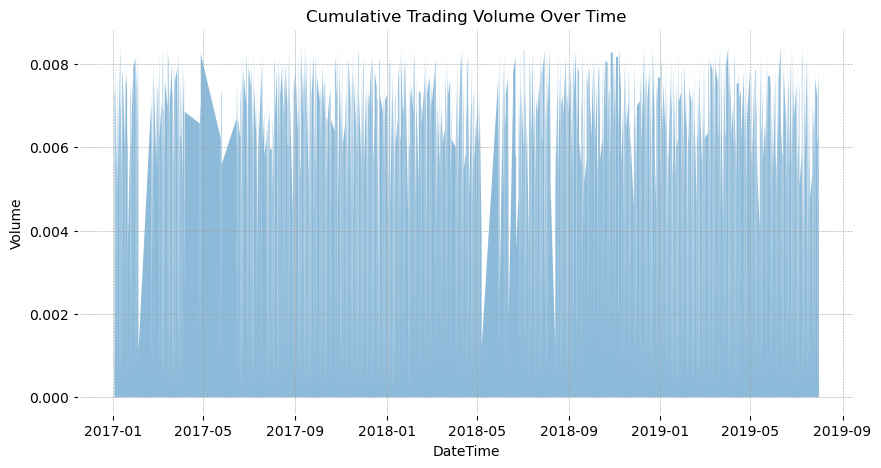

In [137]:
plt.figure(figsize=(10, 5))
plt.fill_between(df.index, df['volume'], alpha=0.5)
plt.title('Cumulative Trading Volume Over Time')
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.show()

plot DateTime vs Volume

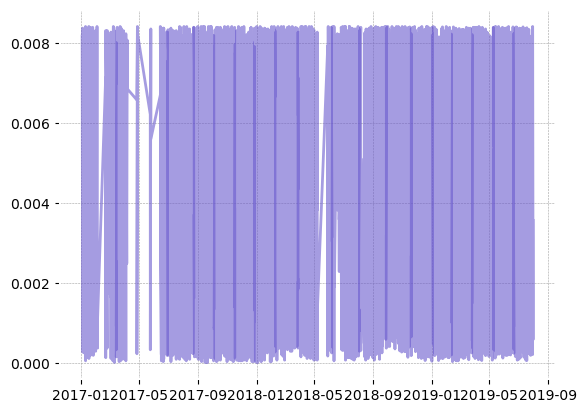

In [138]:
plt.plot(df.index, df['volume'], color='Slateblue', alpha=0.6)

In [139]:
df

open      high       low     close    volume  \
DateTime                                                                
2017-01-02 09:19:00  0.061962  0.059652  0.062981  0.061480  0.008166   
2017-01-02 09:23:00  0.061370  0.059004  0.062389  0.061104  0.006313   
2017-01-02 09:24:00  0.061154  0.058681  0.062335  0.061104  0.004281   
2017-01-02 09:25:00  0.061047  0.058896  0.062443  0.061319  0.005336   
2017-01-02 09:26:00  0.061370  0.058896  0.062443  0.061373  0.003845   
...                       ...       ...       ...       ...       ...   
2019-07-31 11:26:00  0.376400  0.374629  0.377400  0.376420  0.001216   
2019-07-31 11:27:00  0.376561  0.374953  0.377669  0.376851  0.001692   
2019-07-31 11:28:00  0.376723  0.374845  0.377723  0.376528  0.000589   
2019-07-31 11:29:00  0.376669  0.375222  0.377615  0.377120  0.002142   
2019-07-31 11:30:00  0.377153  0.375600  0.378368  0.377389  0.003565   

                     open_interest  color  day  month  hour  minute  
DateTime                                                             
2017-01-02 09:19:00       0.112768    red    2      1     9      19  
2017-01-02 09:23:00       0.113499    red    2      1     9      23  
2017-01-02 09:24:00       0.113499    red    2      1     9      24  
2017-01-02 09:25:00       0.114185  green    2      1     9      25  
2017-01-02 09:26:00       0.114185  green    2      1     9      26  
...                            ...    ...  ...    ...   ...     ...  
2019-07-31 11:26:00       0.087642  green   31      7    11      26  
2019-07-31 11:27:00       0.087642  green   31      7    11      27  
2019-07-31 11:28:00       0.087642    red   31      7    11      28  
2019-07-31 11:29:00       0.087564  green   31      7    11      29  
2019-07-31 11:30:00       0.087564  green   31      7    11      30  

[173384 rows x 11 columns]

This code imports `mplfinance` library using the alias `mpf`. `mplfinance` is a Python package for financial charting and plotting using Matplotlib. It provides a convenient interface for creating various types of financial plots, including candlestick charts, OHLC (open-high-low-close) charts, and more.

In [140]:
import mplfinance as mpf

Create a candlestick chart using mplfinance

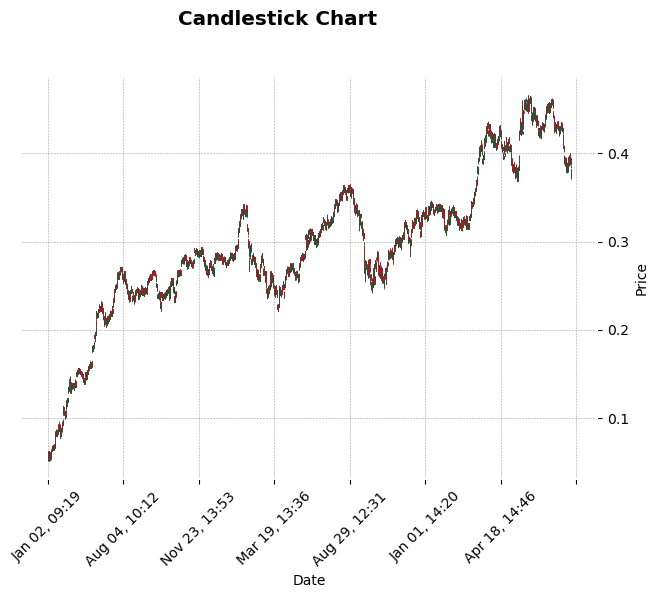

In [141]:
mpf.plot(df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', xlabel='Date')

create a line chart using mplfinance

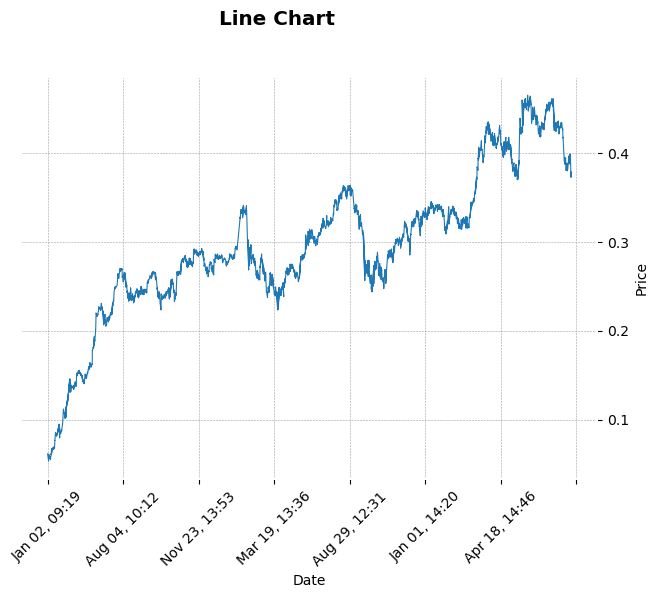

In [142]:
mpf.plot(df, type='line', style='charles', title='Line Chart', ylabel='Price', xlabel='Date')

This code calculates the **Rolling mean** (moving average) of the closing prices for two different window sizes: 50 and 200 days. It then creates a plot using matplotlib to visualize the actual closing prices (`'close'`), the 50-day **Moving Average**(`'MA50'`), and the 200-day moving average (`'MA200'`). The plot displays the trends of these values over time. The legend indicates the corresponding lines for each plotted series, and axis labels provide clarity. Finally, `plt.show()` displays the plot.

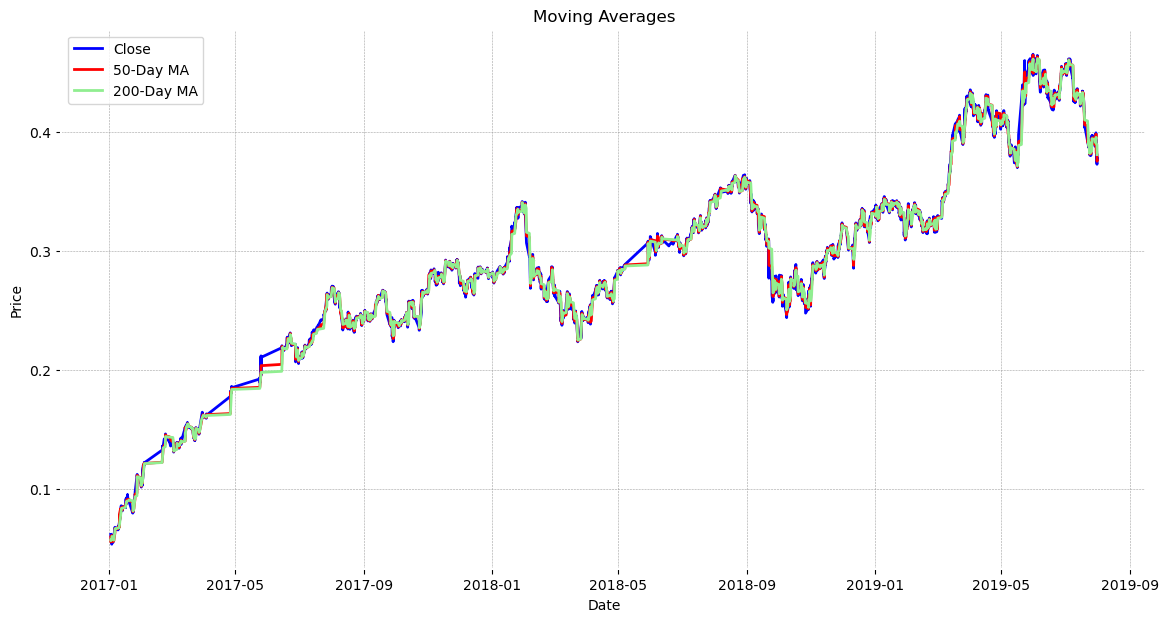

In [143]:
#calculate rolling mean with two different window sizes i.e; 50 and 200
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
#Actual close plot
plt.plot(df.index, df['close'], label='Close', color='blue')
#Moving Average with window size of 50
plt.plot(df.index, df['MA50'], label='50-Day MA', color='red')
#Moving Average with window size of 200
plt.plot(df.index, df['MA200'], label='200-Day MA', color='lightgreen')
df.fillna(0, inplace=True)
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This code calculates **Bollinger Bands** based on a 20-day moving average (`'MA20'`) and standard deviation (`'stddev'`) of the closing prices (`'close'`). It then plots the closing prices along with the upper and lower Bollinger Bands. The area between the upper and lower bands is filled with a translucent color for better visualization. The plot provides insights into price volatility and potential trading signals based on Bollinger Bands.

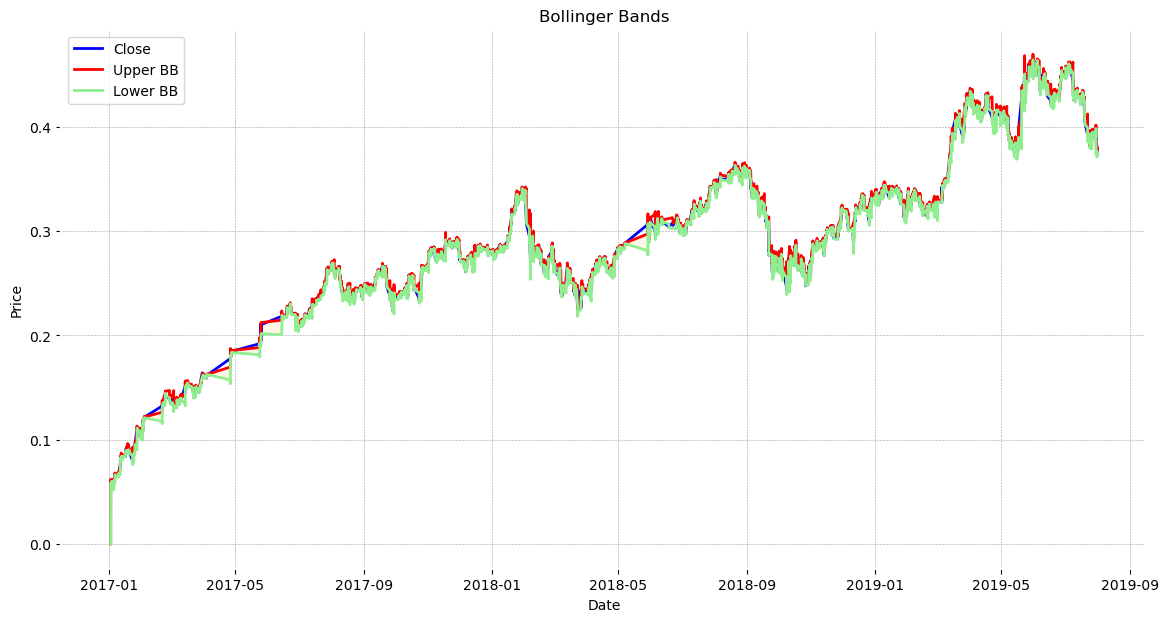

In [144]:
#Calculate Moving Avg with window size as 20 for the column 'close'
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
#Upper Bollinger Bands
df['UpperBB'] = df['MA20'] + (df['stddev'] * 2)
#Lower Bollinger Bands
df['LowerBB'] = df['MA20'] - (df['stddev'] * 2)

plt.figure(figsize=(14, 7))
df.fillna(0, inplace=True)
plt.plot(df.index, df['close'], label='Close', color='blue')
plt.plot(df.index, df['UpperBB'], label='Upper BB', color='red')
plt.plot(df.index, df['LowerBB'], label='Lower BB', color='lightgreen')
plt.fill_between(df.index, df['LowerBB'], df['UpperBB'], color='orange', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


This code defines a function `calculate_rsi()` to compute the **Relative Strength Index (RSI)** based on the closing prices in a DataFrame. The RSI is calculated using the average gains and losses over a specified window size (default is 14). The resulting RSI values are plotted over time to visualize the momentum of the market. Additionally, horizontal lines are added at RSI levels of 70 (overbought) and 30 (oversold) for reference. The plot provides insights into potential overbought or oversold conditions in the market.

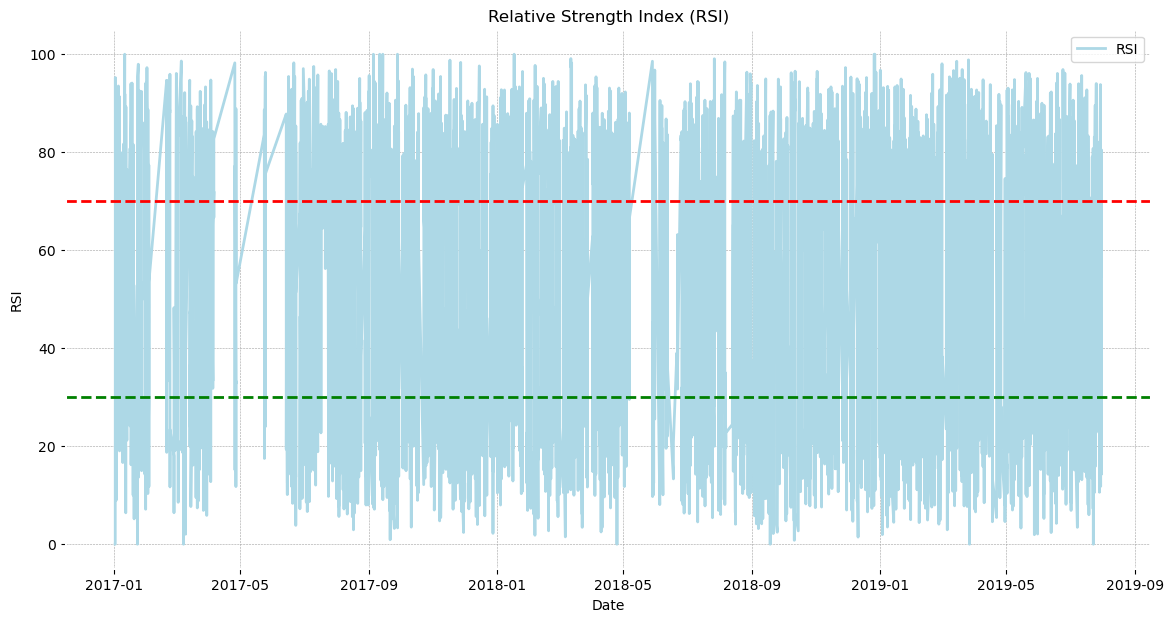

In [145]:
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)
df.fillna(0, inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI'], label='RSI', color='lightblue')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()


This code calculates the **Moving Average Convergence Divergence (MACD)** indicator based on the exponential moving averages (EMAs) of closing prices. It computes two EMAs, one with a shorter span (12 periods, labeled as 'EMA12') and another with a longer span (26 periods, labeled as 'EMA26'). The MACD line is then obtained by subtracting the longer EMA from the shorter one. Additionally, a signal line is calculated as the exponential moving average of the MACD line over a span of 9 periods. The resulting MACD and signal lines are plotted over time to visualize their movements. This plot helps traders identify potential buy or sell signals based on MACD crossovers.

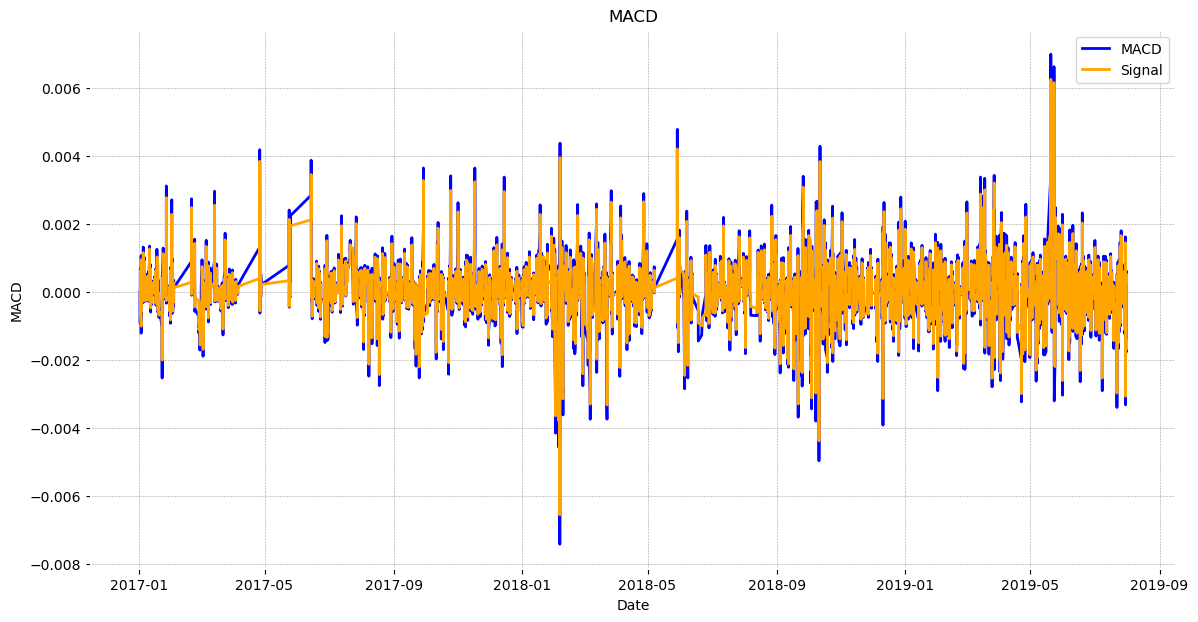

In [146]:
df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df.fillna(0, inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal'], label='Signal', color='orange')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

Scatter Plot - open vs close

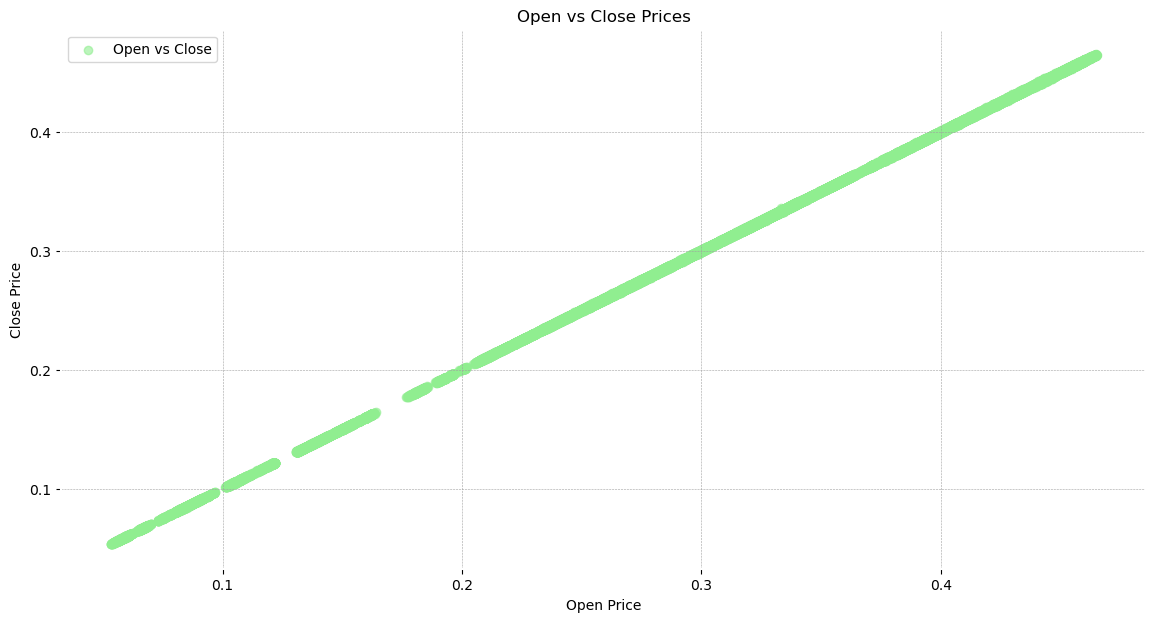

In [147]:
plt.figure(figsize=(14, 7))
plt.scatter(df['open'], df['close'], label='Open vs Close', color='lightgreen', alpha=0.6)
plt.title('Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

This code generates a heatmap of correlations between various financial features (open, high, low, close, and volume) using seaborn (`sns`) and matplotlib (`plt`). The `corr()` function computes the correlation coefficients between these features, and `sns.heatmap()` visualizes these coefficients as a color-coded matrix. The `annot=True` parameter displays the correlation values within each cell of the heatmap, and `cmap='viridis'` sets the color scheme. Finally, the plot is displayed with a title using `plt.title()` and `plt.show()`. This heatmap provides insights into the strength and direction of relationships between different features.

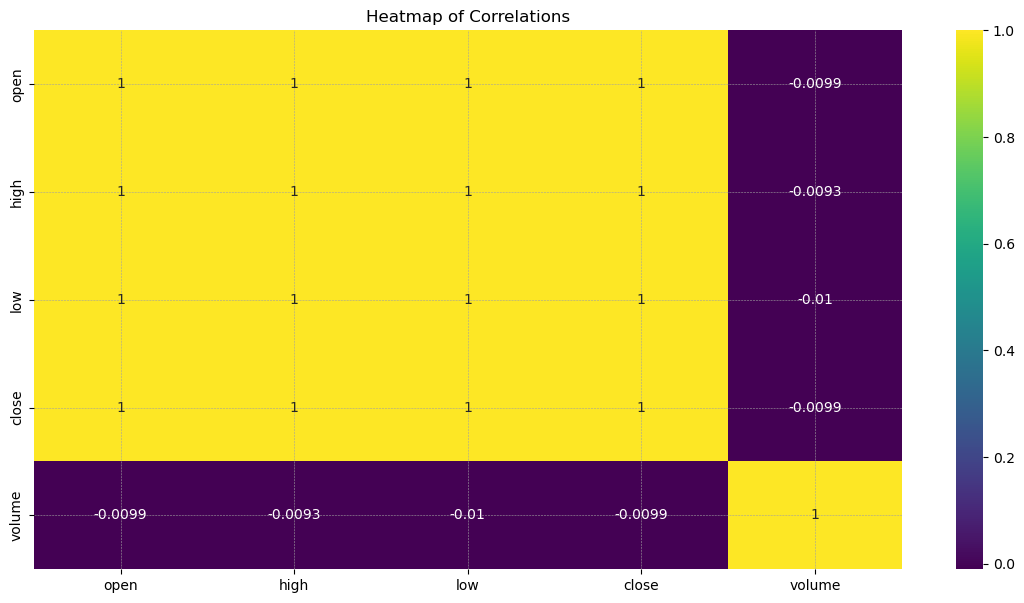

In [148]:
plt.figure(figsize=(14, 7))
correlation = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Heatmap of Correlations')
plt.show()

This code segment performs feature engineering by considering data from past 30 or 60 candles (or periods). For each window size:

1. **Moving Averages (`ma_window`):**
   - Calculates the rolling mean of closing prices.

2. **Rolling Maximums and Minimums (`roll_max_window`, `roll_min_window`):**
   - Computes the rolling maximum and minimum of high and low prices, respectively.

3. **Returns (`return_window`):**
   - Calculates the percentage change in closing prices over the specified window.

4. **Volatility (`volatility_window`):**
   - Computes the rolling standard deviation of percentage changes in closing prices, representing volatility.

5. **Relative Strength Index (RSI) (`rsi_window`):**
   - Calculates the RSI indicator based on the average gains and losses over the specified window.

After computing these features, any NaN values resulting from rolling windows are filled with 0.


In [149]:
# Feature Engineering
#considering data from past 30 or 60 candles
window_sizes = [30, 60]

for window in window_sizes:
    # Moving averages
    df[f'ma_{window}'] = df['close'].rolling(window=window).mean()

    # Rolling maximums and minimums
    df[f'roll_max_{window}'] = df['high'].rolling(window=window).max()
    df[f'roll_min_{window}'] = df['low'].rolling(window=window).min()

    # Returns
    df[f'return_{window}'] = df['close'].pct_change(periods=window)

    # Volatility
    df[f'volatility_{window}'] = df['close'].pct_change().rolling(window=window).std()

    # Relative Strength Index (RSI)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df[f'rsi_{window}'] = 100 - (100 / (1 + rs))

# Fill NaNs if needed (e.g., due to rolling windows)
df.fillna(0, inplace=True)

In [150]:
df.shape

(173384, 34)

In [151]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'open_interest', 'color',
       'day', 'month', 'hour', 'minute', 'MA50', 'MA200', 'MA20', 'stddev',
       'UpperBB', 'LowerBB', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal',
       'ma_30', 'roll_max_30', 'roll_min_30', 'return_30', 'volatility_30',
       'rsi_30', 'ma_60', 'roll_max_60', 'roll_min_60', 'return_60',
       'volatility_60', 'rsi_60'],
      dtype='object')

## Clustering

In [152]:
from sklearn.cluster import KMeans

This code segment applies K-means clustering to the encoded DataFrame (`df_encoded`). 

1. **One-Hot Encoding (`pd.get_dummies()`):**
   - Encodes categorical variable 'color' into dummy/indicator variables.

2. **K-means Clustering:**
   - Initializes a K-means model (`kmeans`) with default parameters and fits it to the encoded DataFrame.

3. **Elbow Method for Optimal Number of Clusters:**
   - Iterates through a range of cluster numbers (from 1 to 10) and computes the within-cluster sum of squares (WCSS) for each.
   - Plots the WCSS values against the number of clusters to visualize the "elbow point," where the rate of decrease in WCSS slows down.
   - The elbow point helps determine the optimal number of clusters for K-means clustering.



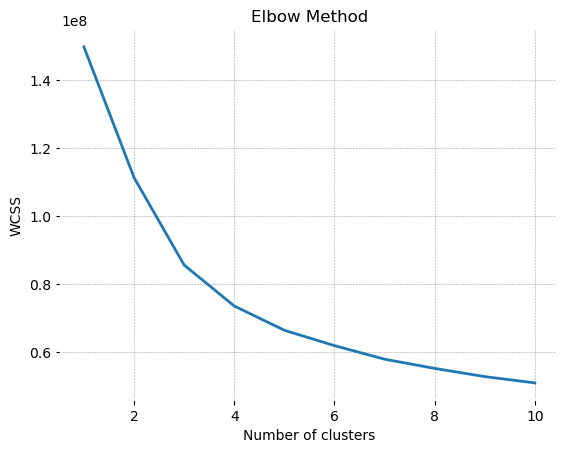

In [153]:
# Apply K-means clustering
df_encoded = pd.get_dummies(df, columns=['color'])

kmeans = KMeans(random_state=42)
kmeans.fit(df_encoded)

# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [154]:
df_encoded

open      high       low     close    volume  \
DateTime                                                                
2017-01-02 09:19:00  0.061962  0.059652  0.062981  0.061480  0.008166   
2017-01-02 09:23:00  0.061370  0.059004  0.062389  0.061104  0.006313   
2017-01-02 09:24:00  0.061154  0.058681  0.062335  0.061104  0.004281   
2017-01-02 09:25:00  0.061047  0.058896  0.062443  0.061319  0.005336   
2017-01-02 09:26:00  0.061370  0.058896  0.062443  0.061373  0.003845   
...                       ...       ...       ...       ...       ...   
2019-07-31 11:26:00  0.376400  0.374629  0.377400  0.376420  0.001216   
2019-07-31 11:27:00  0.376561  0.374953  0.377669  0.376851  0.001692   
2019-07-31 11:28:00  0.376723  0.374845  0.377723  0.376528  0.000589   
2019-07-31 11:29:00  0.376669  0.375222  0.377615  0.377120  0.002142   
2019-07-31 11:30:00  0.377153  0.375600  0.378368  0.377389  0.003565   

                     open_interest  day  month  hour  minute  ...  \
DateTime                                                      ...   
2017-01-02 09:19:00       0.112768    2      1     9      19  ...   
2017-01-02 09:23:00       0.113499    2      1     9      23  ...   
2017-01-02 09:24:00       0.113499    2      1     9      24  ...   
2017-01-02 09:25:00       0.114185    2      1     9      25  ...   
2017-01-02 09:26:00       0.114185    2      1     9      26  ...   
...                            ...  ...    ...   ...     ...  ...   
2019-07-31 11:26:00       0.087642   31      7    11      26  ...   
2019-07-31 11:27:00       0.087642   31      7    11      27  ...   
2019-07-31 11:28:00       0.087642   31      7    11      28  ...   
2019-07-31 11:29:00       0.087564   31      7    11      29  ...   
2019-07-31 11:30:00       0.087564   31      7    11      30  ...   

                     volatility_30     rsi_30     ma_60  roll_max_60  \
DateTime                                                               
2017-01-02 09:19:00       0.000000   0.000000  0.000000     0.000000   
2017-01-02 09:23:00       0.000000   0.000000  0.000000     0.000000   
2017-01-02 09:24:00       0.000000   0.000000  0.000000     0.000000   
2017-01-02 09:25:00       0.000000   0.000000  0.000000     0.000000   
2017-01-02 09:26:00       0.000000   0.000000  0.000000     0.000000   
...                            ...        ...       ...          ...   
2019-07-31 11:26:00       0.001048  62.580645  0.375551     0.376247   
2019-07-31 11:27:00       0.001015  61.333333  0.375553     0.376247   
2019-07-31 11:28:00       0.001032  58.709677  0.375556     0.376247   
2019-07-31 11:29:00       0.001059  62.576687  0.375580     0.376247   
2019-07-31 11:30:00       0.001063  63.473054  0.375602     0.376247   

                     roll_min_60  return_60  volatility_60     rsi_60  \
DateTime                                                                
2017-01-02 09:19:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:23:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:24:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:25:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:26:00      0.00000   0.000000       0.000000   0.000000   
...                          ...        ...            ...        ...   
2019-07-31 11:26:00      0.37455  -0.001571       0.001067  48.387097   
2019-07-31 11:27:00      0.37455   0.000286       0.001074  50.290698   
2019-07-31 11:28:00      0.37455   0.000429       0.001072  50.437318   
2019-07-31 11:29:00      0.37455   0.003869       0.001062  53.958944   
2019-07-31 11:30:00      0.37455   0.003435       0.001056  53.550296   

                     color_green  color_red  
DateTime                                     
2017-01-02 09:19:00        False       True  
2017-01-02 09:23:00        False       True  
2017-01-02 09:24:00        False       True  
2017-01-02 09:25:00         True      False  
2017-01-02 09:

**Feature Importance Plot**

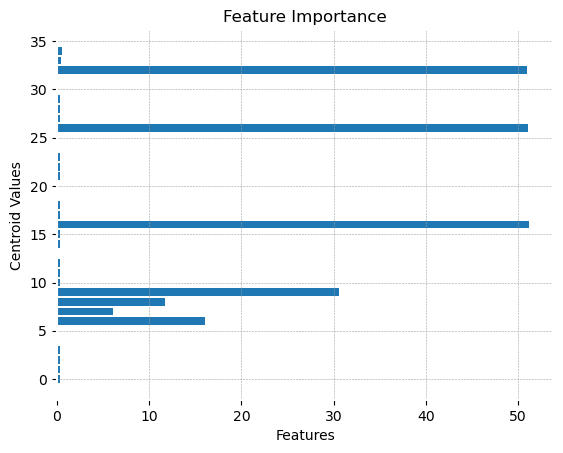

In [155]:
# Getting centroids of clusters
centroids = kmeans.cluster_centers_

# Plotting feature importance
plt.barh(range(df_encoded.shape[1]), centroids.mean(axis=0))
plt.xlabel('Features')
plt.ylabel('Centroid Values')
plt.title('Feature Importance')
plt.show()

**Hierarchical Clustering**

In [156]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

This code snippet imports necessary functions from SciPy for hierarchical clustering and dendrogram plotting.

- **`pdist`**: This function computes the pairwise distances between observations in n-dimensional space. It is typically used as a preprocessing step for hierarchical clustering.

- **`linkage`**: This function performs hierarchical/agglomerative clustering on a set of observations. It takes the output of `pdist` as input and constructs a linkage matrix representing the hierarchical clustering.

- **`dendrogram`**: This function generates a dendrogram plot from the linkage matrix, visualizing the hierarchical clustering structure.


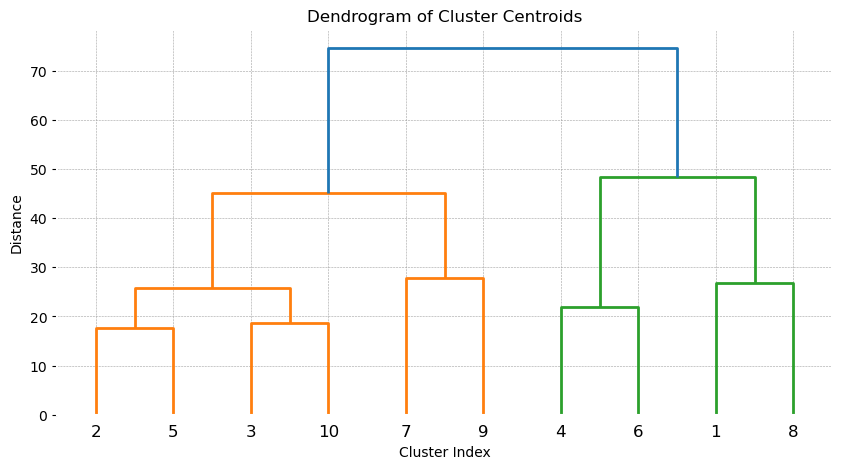

In [157]:
# Calculate pairwise distances between centroids
distances = pdist(centroids)

# Hierarchical clustering
linkage_matrix = linkage(distances, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=range(1, centroids.shape[0]+1))
plt.title('Dendrogram of Cluster Centroids')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

In [158]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'open_interest', 'color',
       'day', 'month', 'hour', 'minute', 'MA50', 'MA200', 'MA20', 'stddev',
       'UpperBB', 'LowerBB', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal',
       'ma_30', 'roll_max_30', 'roll_min_30', 'return_30', 'volatility_30',
       'rsi_30', 'ma_60', 'roll_max_60', 'roll_min_60', 'return_60',
       'volatility_60', 'rsi_60'],
      dtype='object')

In [159]:
numeric_columns = df_encoded.select_dtypes(include=['int', 'float']).columns
df = df_encoded[numeric_columns]

**Visualizing Cluster Profiles**

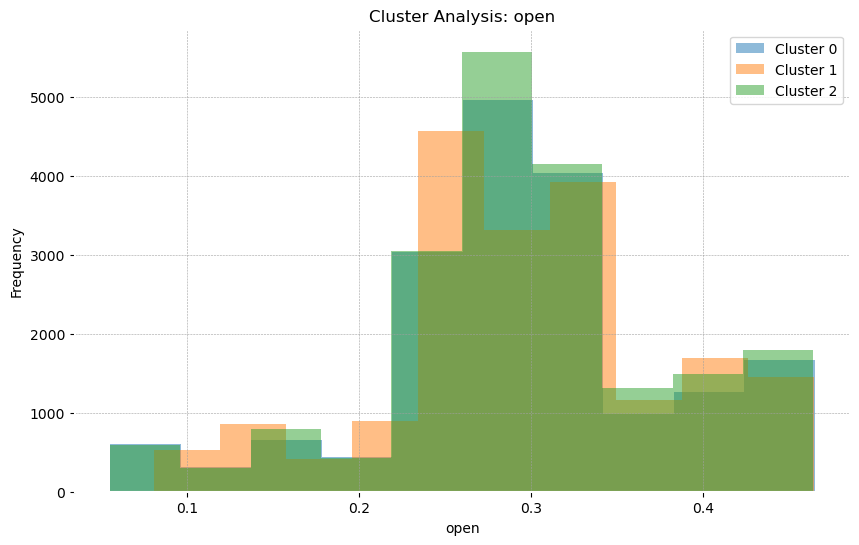

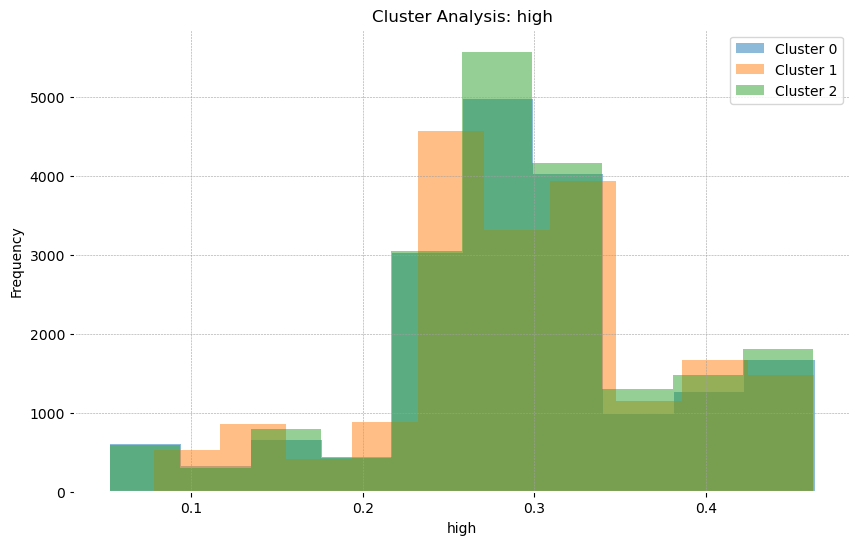

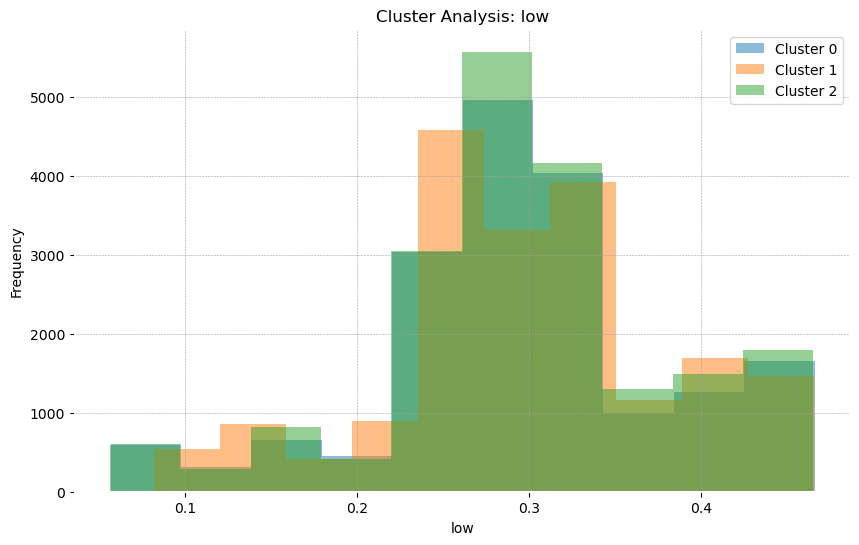

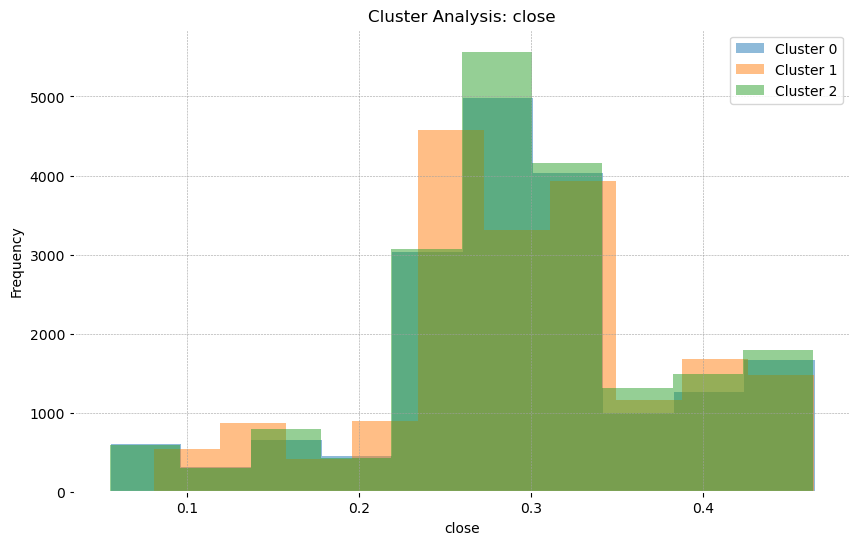

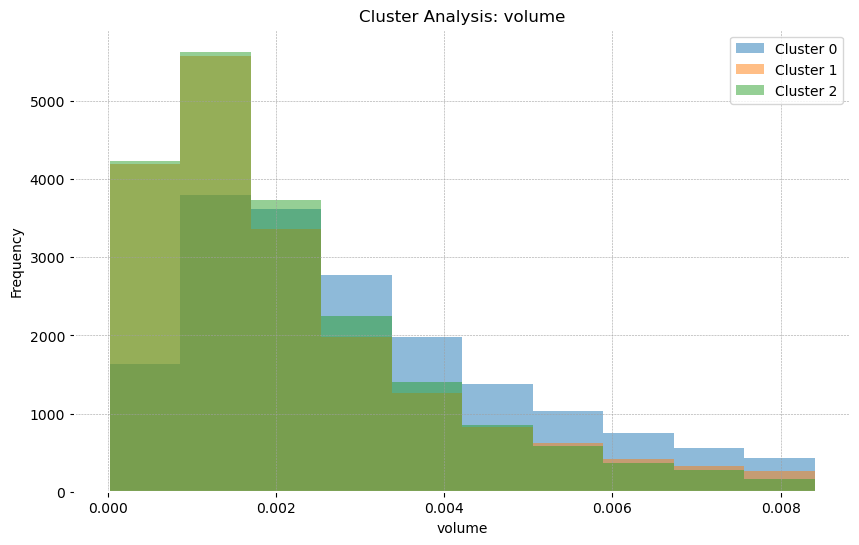

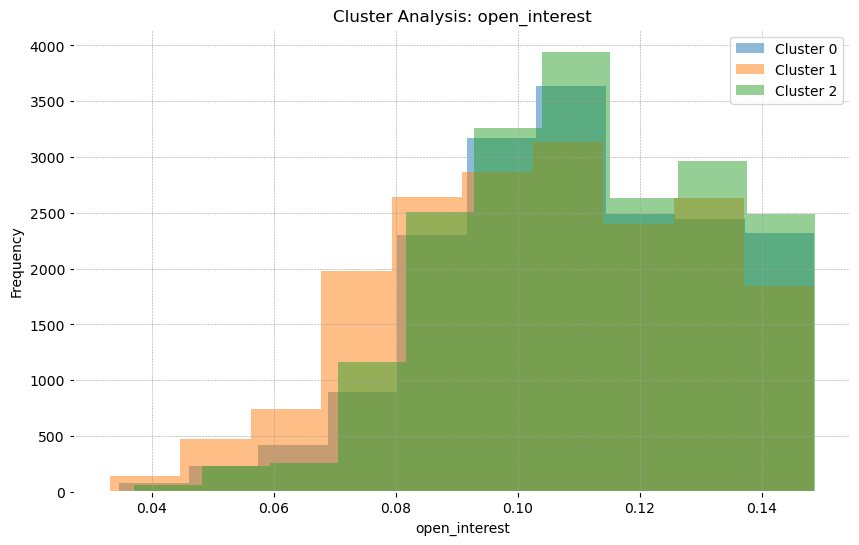

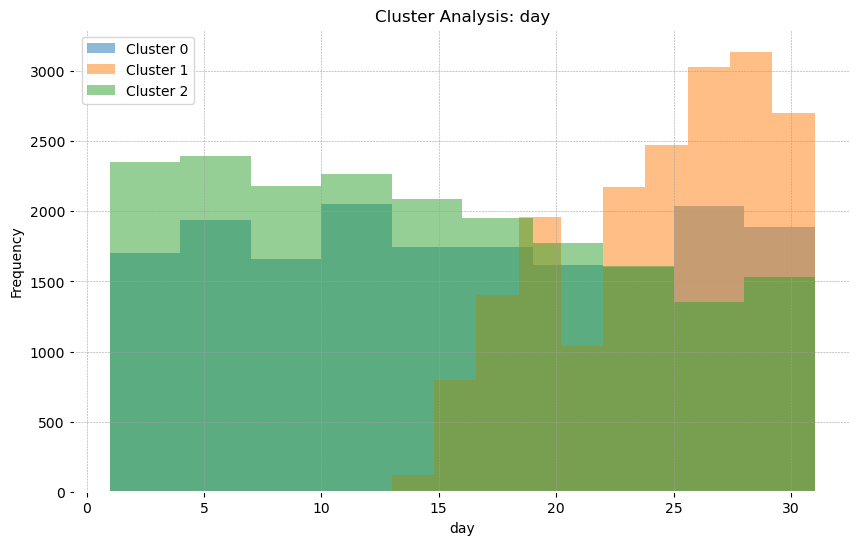

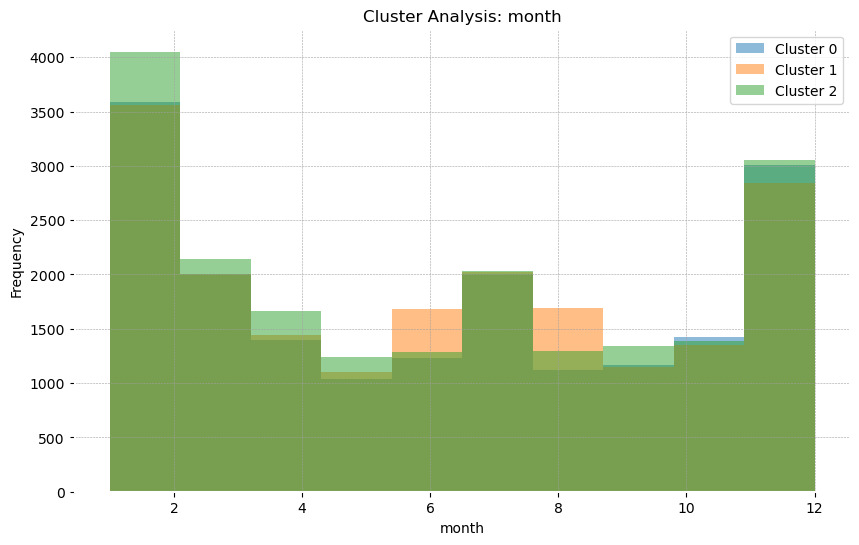

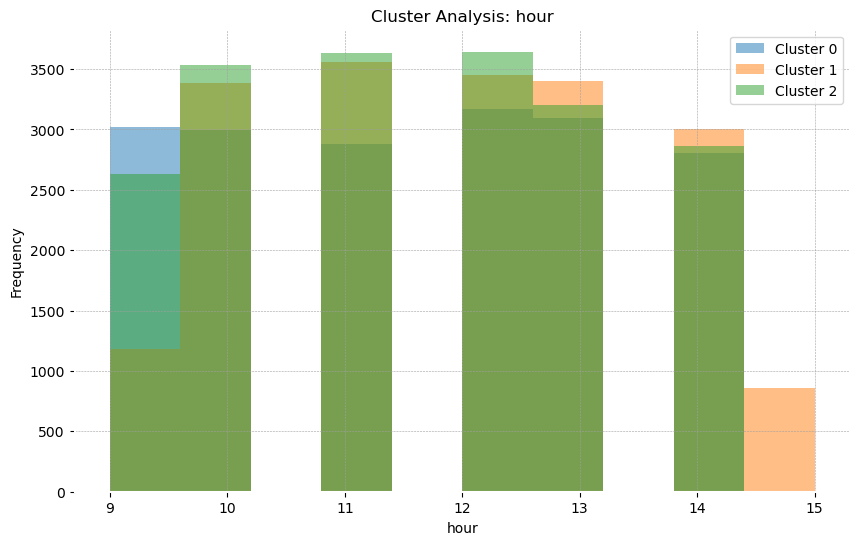

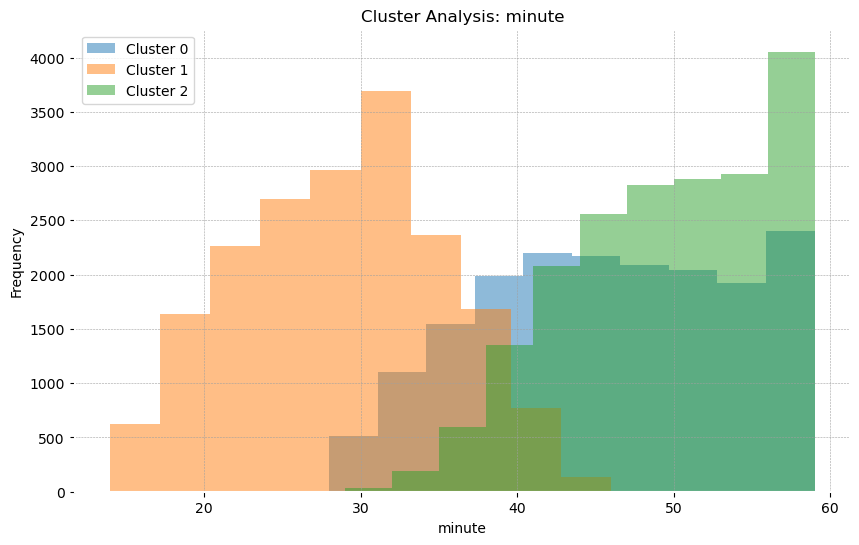

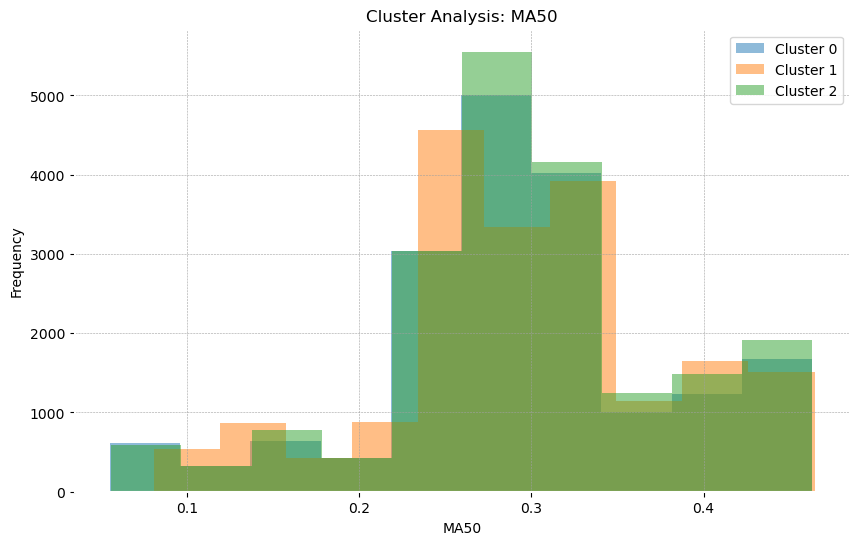

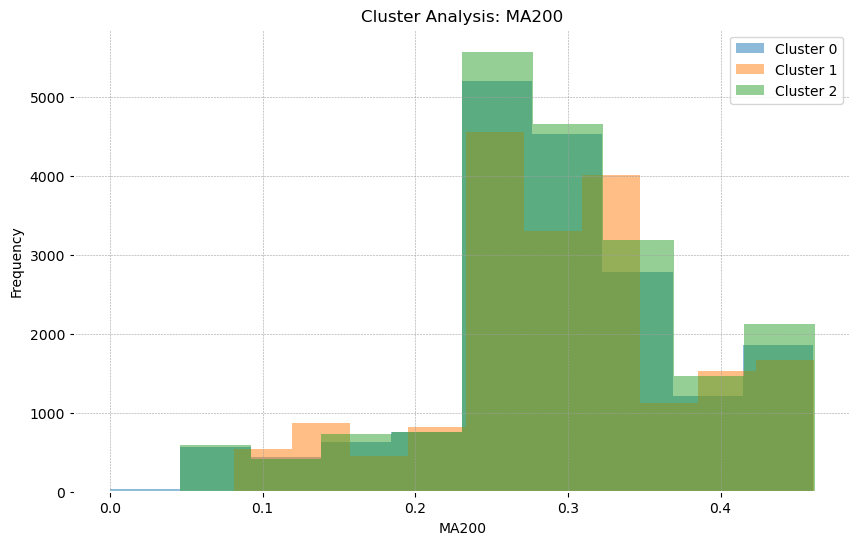

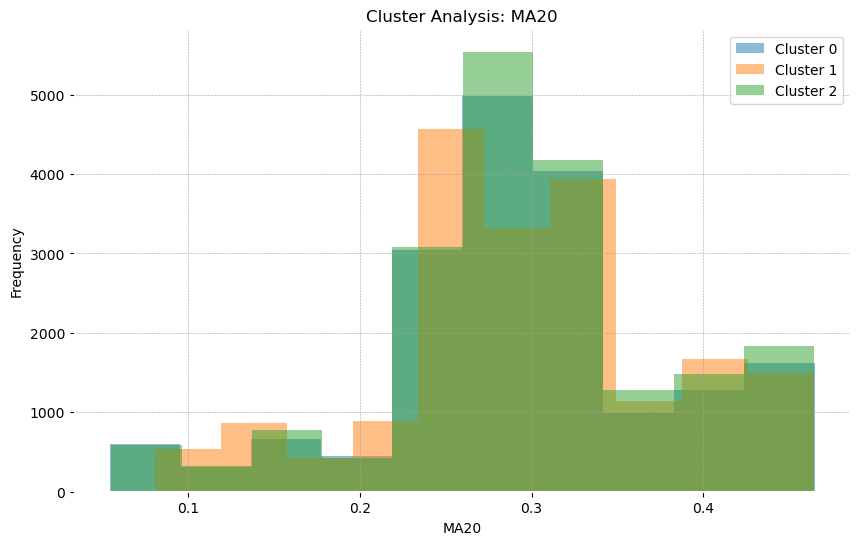

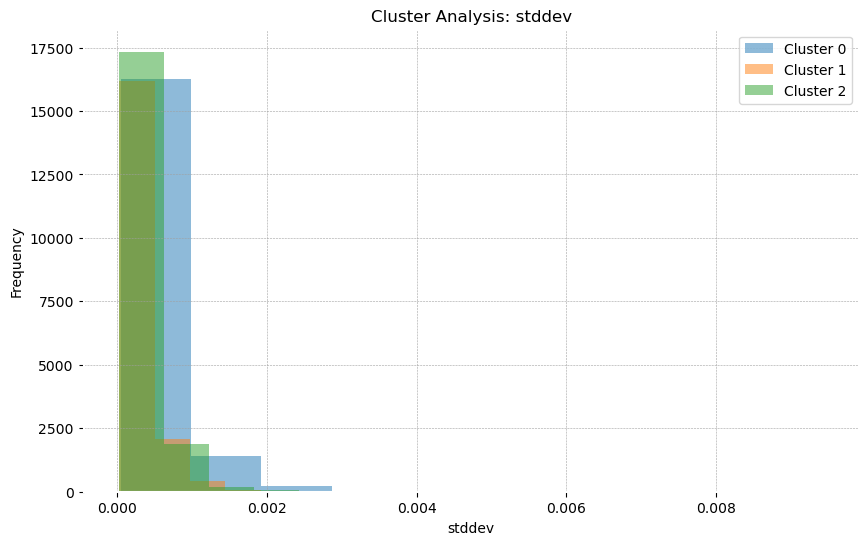

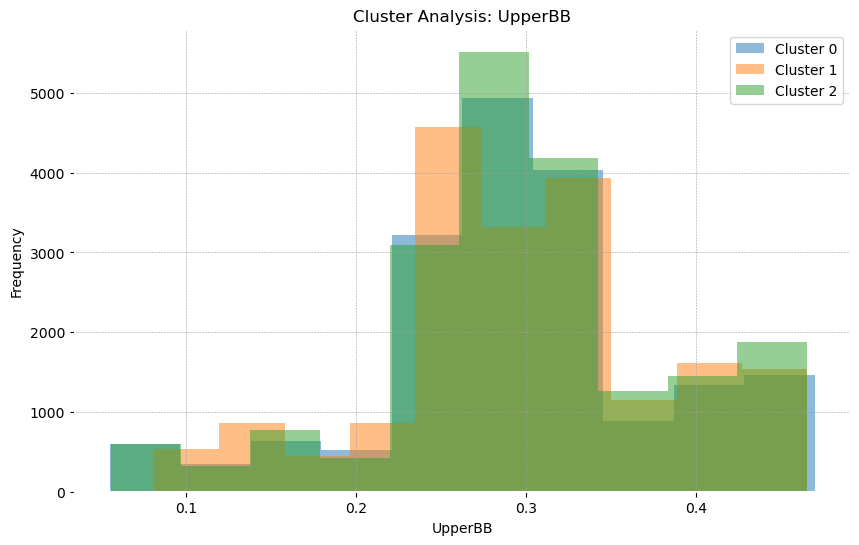

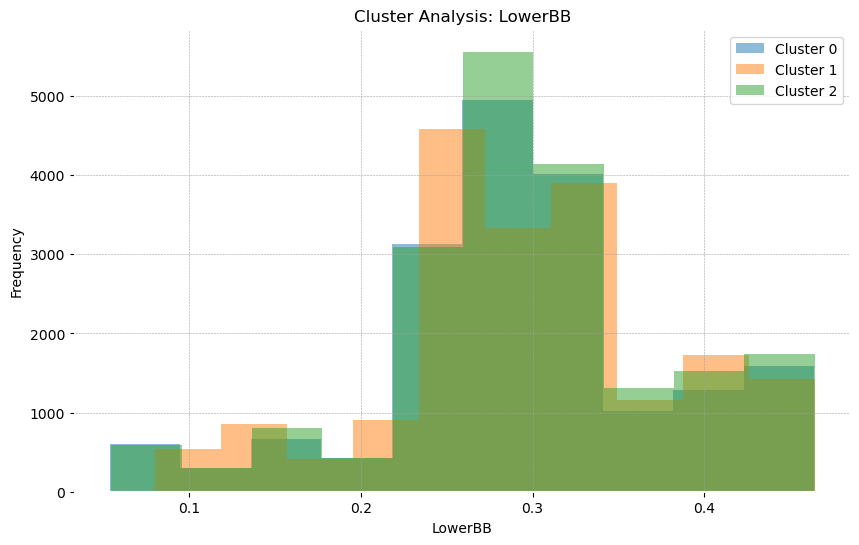

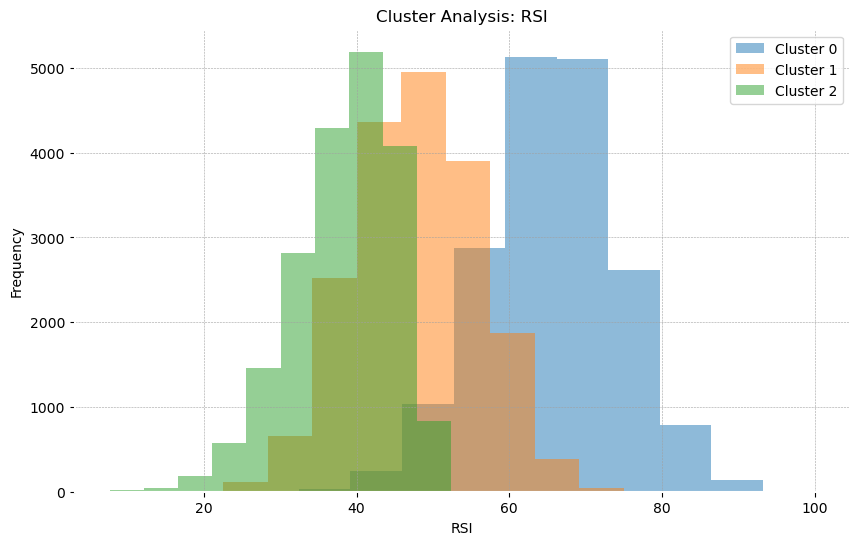

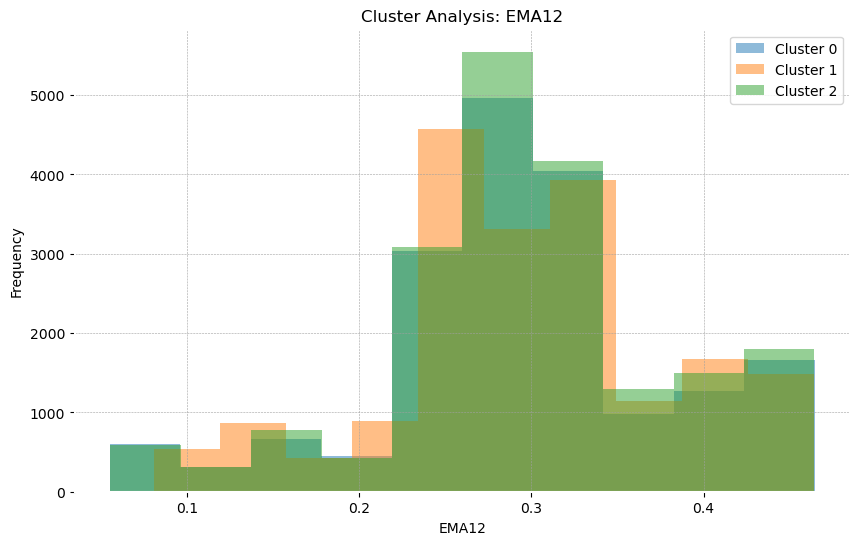

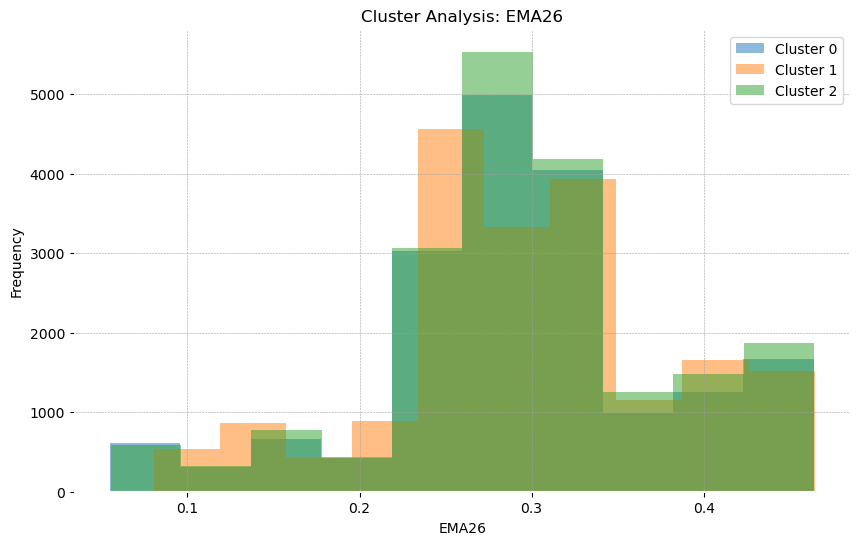

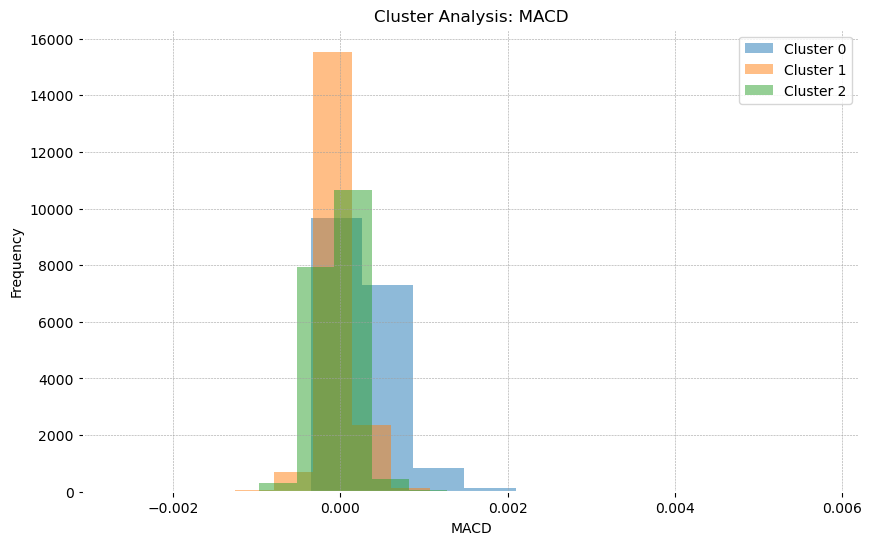

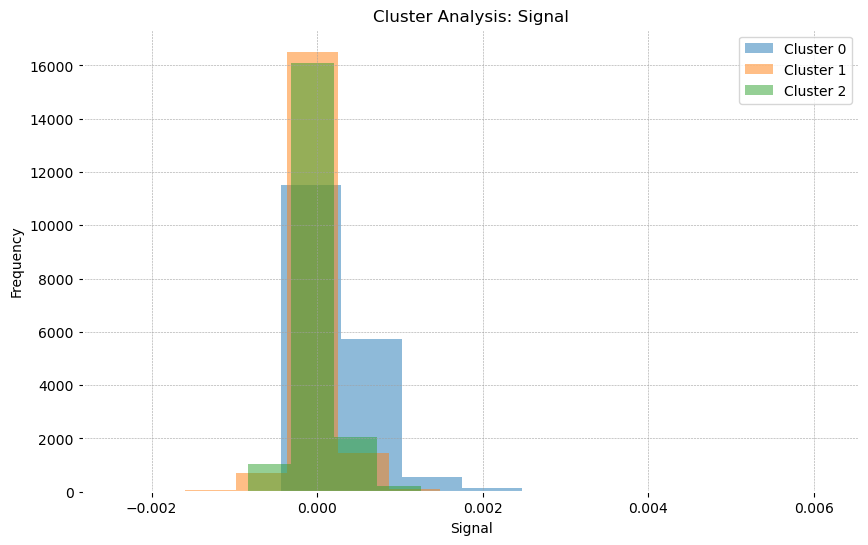

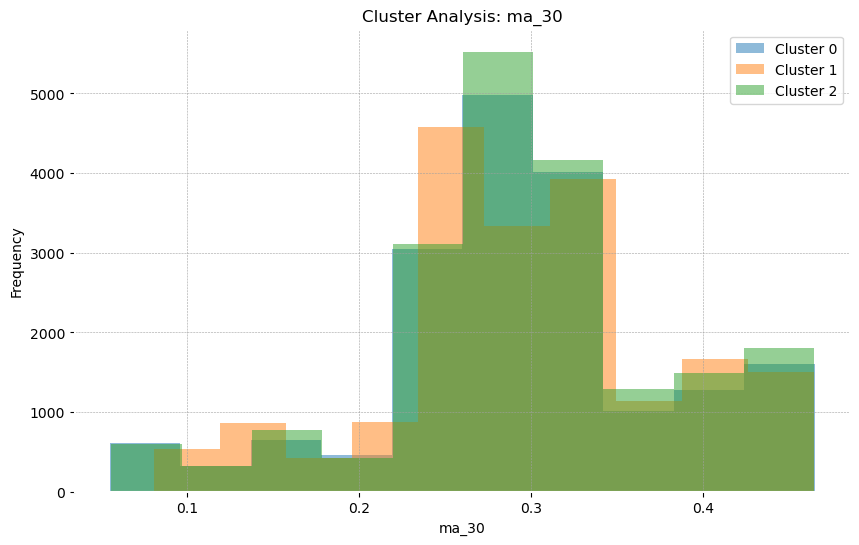

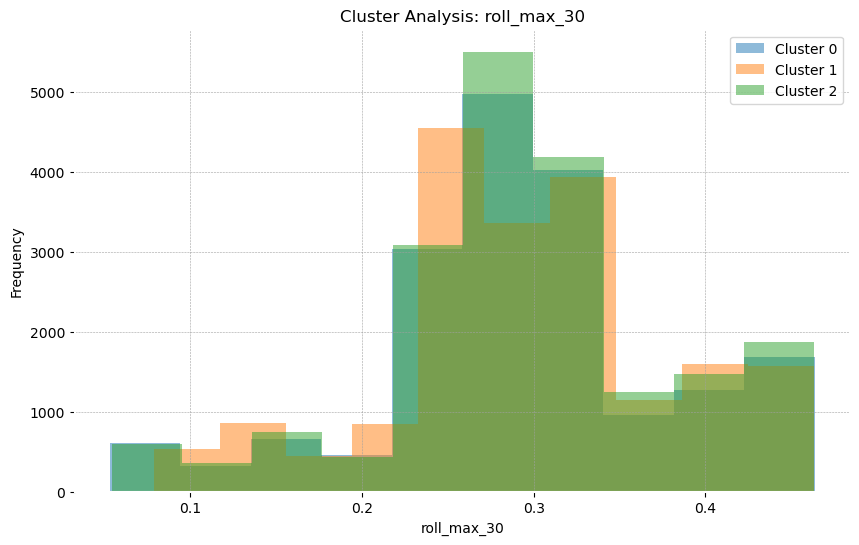

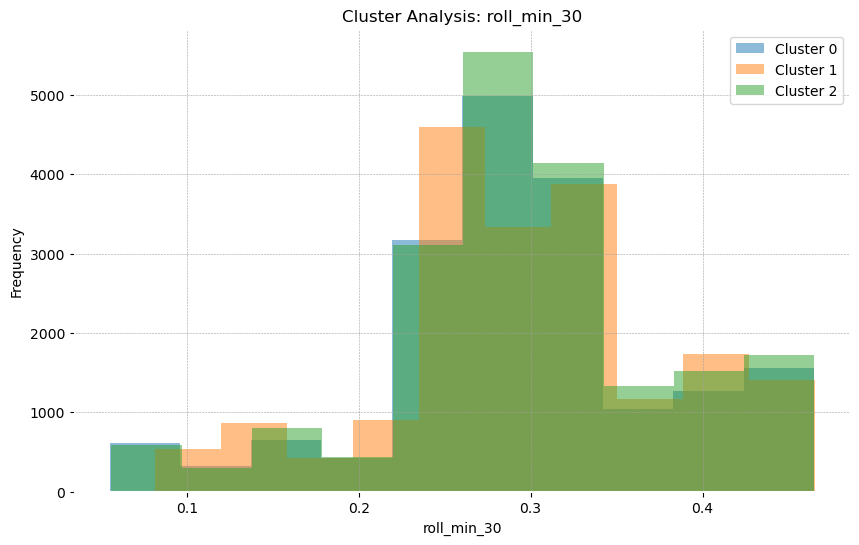

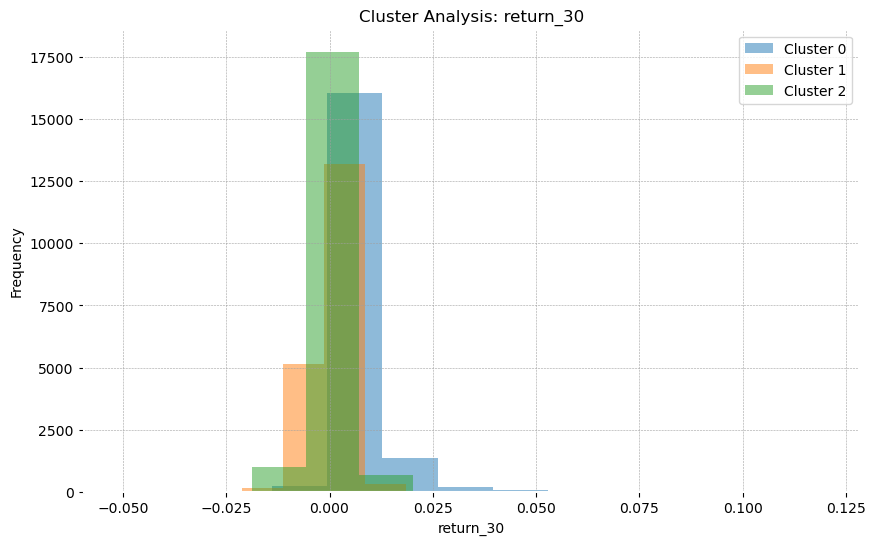

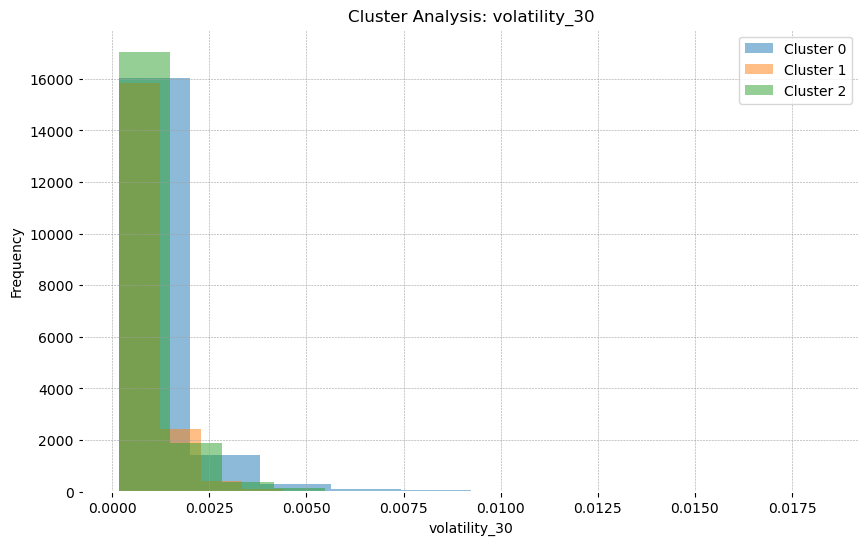

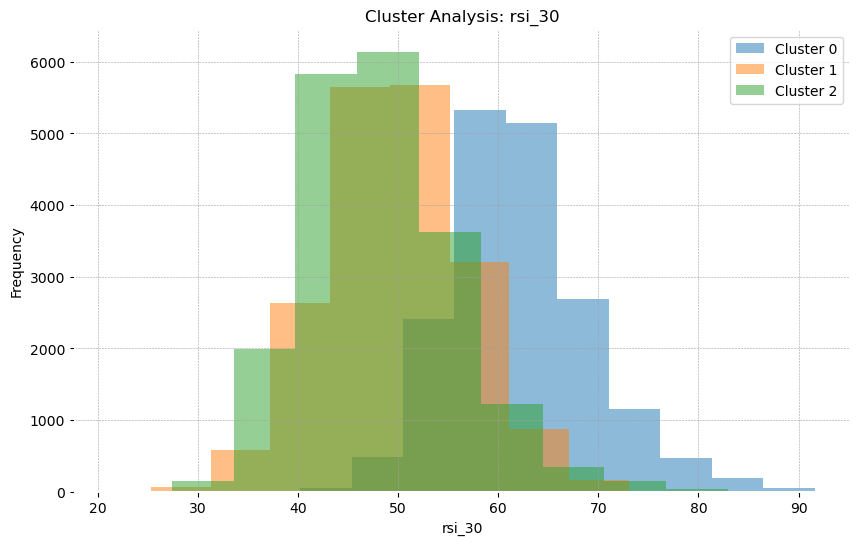

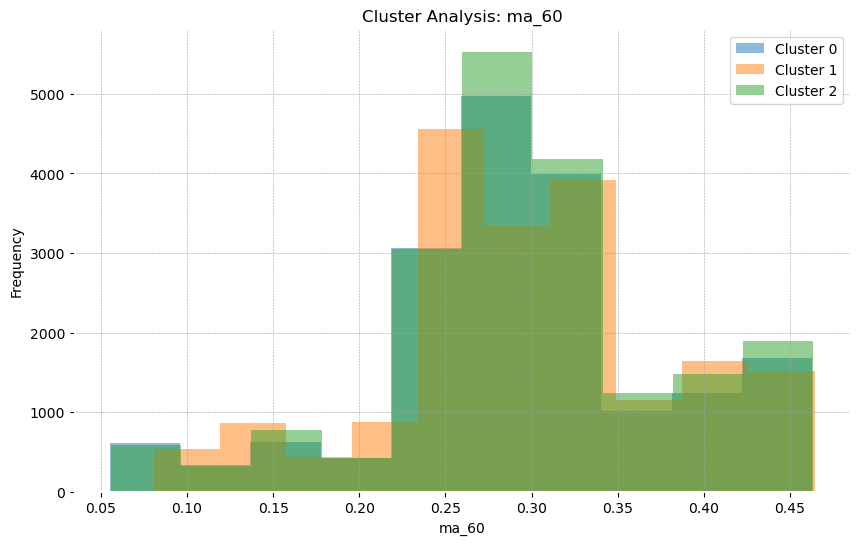

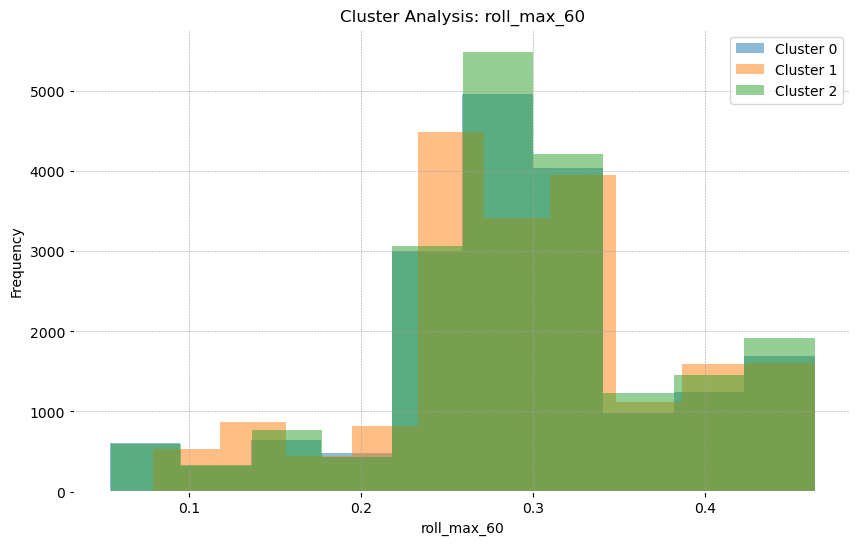

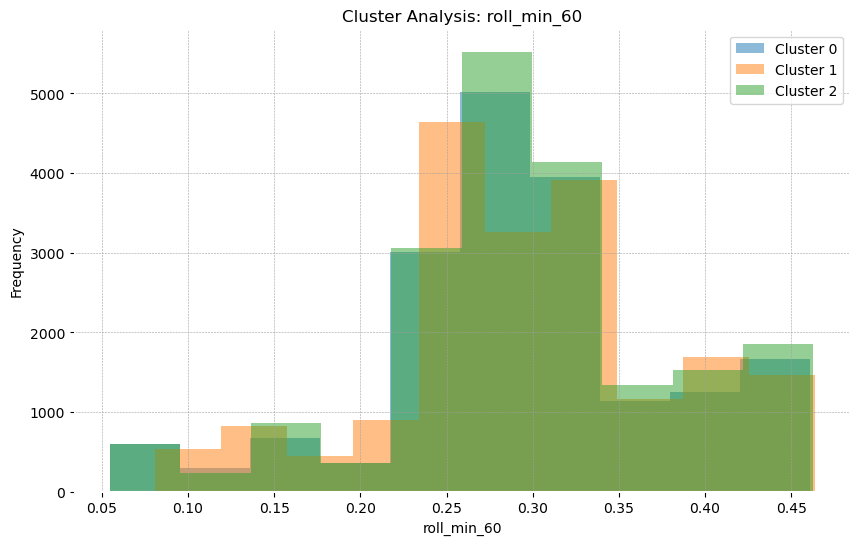

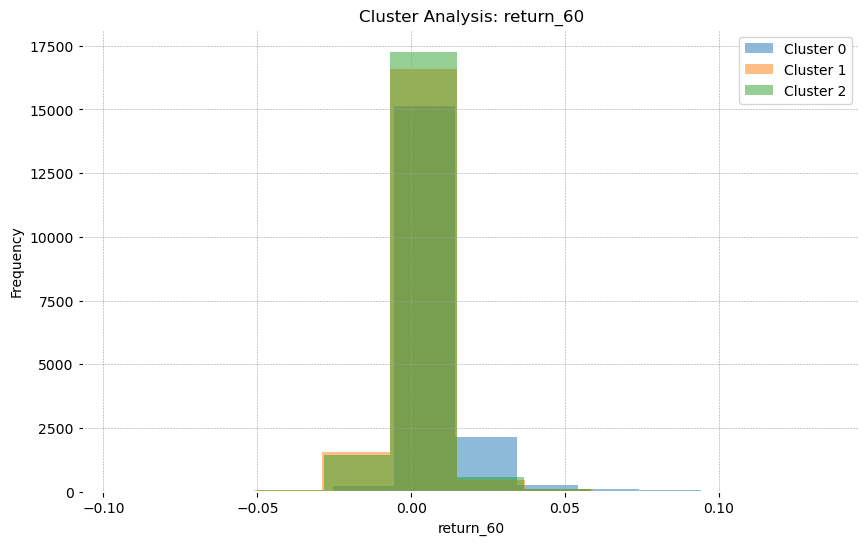

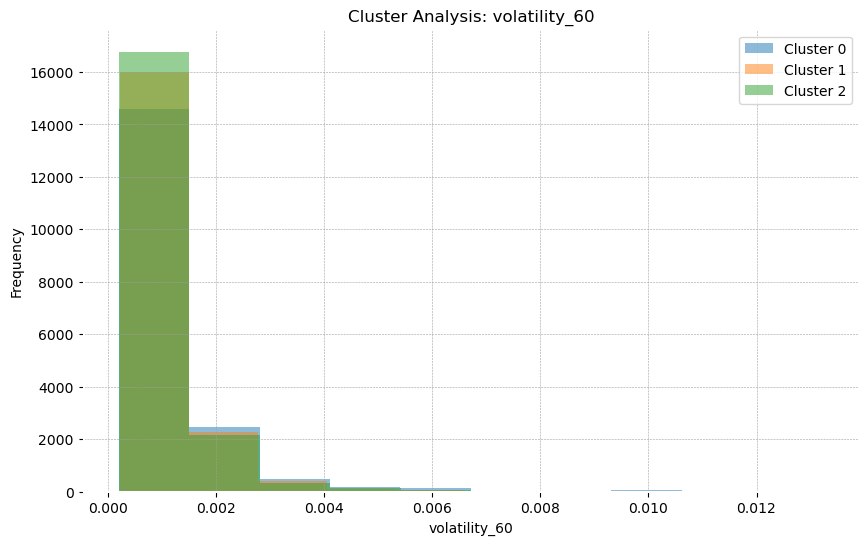

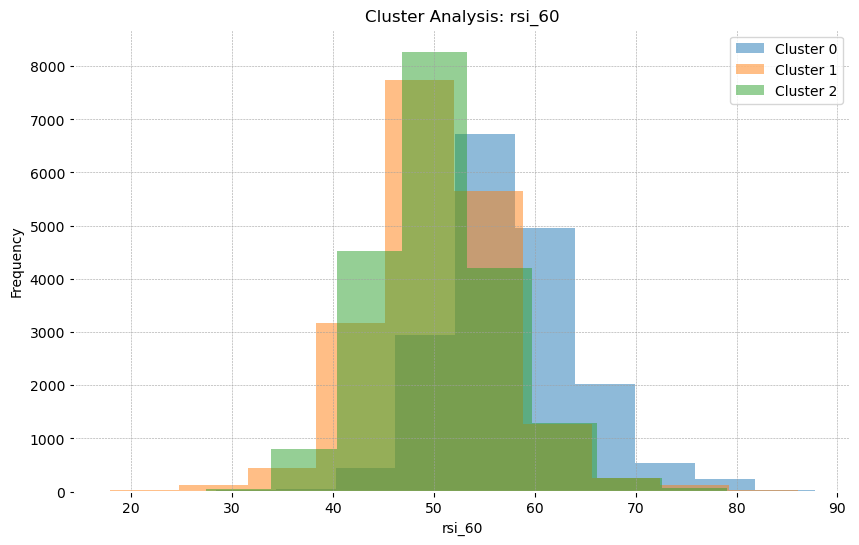

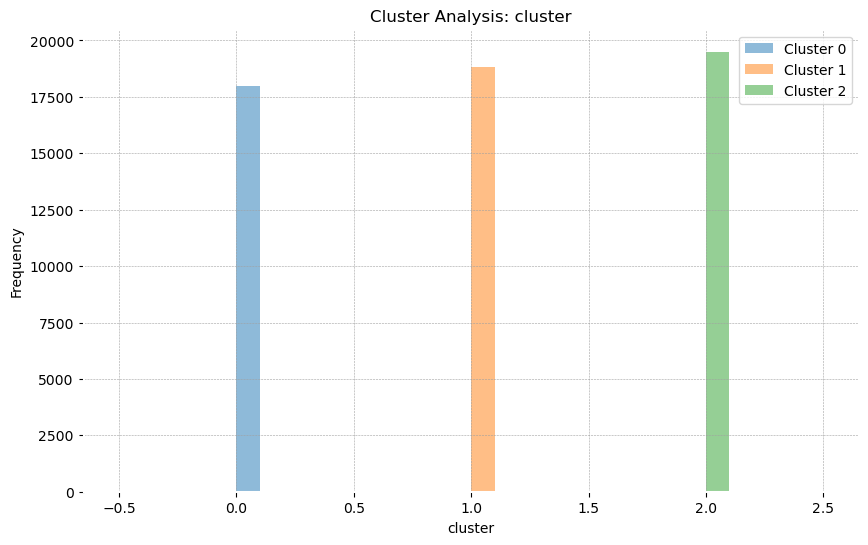

In [160]:
# Assign clusters
df['cluster'] = kmeans.labels_

num_clusters = 3

# Explore cluster characteristics
cluster_characteristics = df.groupby('cluster').agg(['mean', 'std', 'count'])
# Visualize cluster profiles
for column in df.columns:
    plt.figure(figsize=(10, 6))
    for cluster in range(num_clusters):
        plt.hist(df[df['cluster'] == cluster][column], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Cluster Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

**Comparing Clusters**

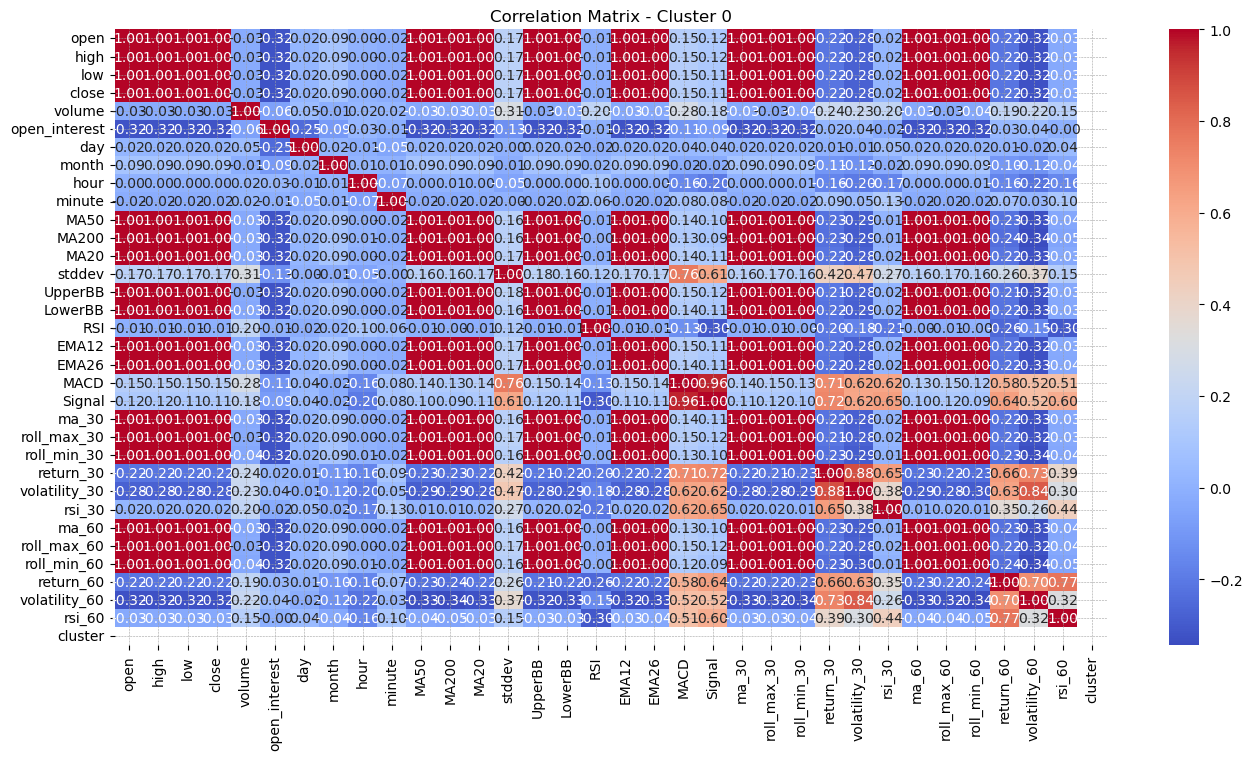

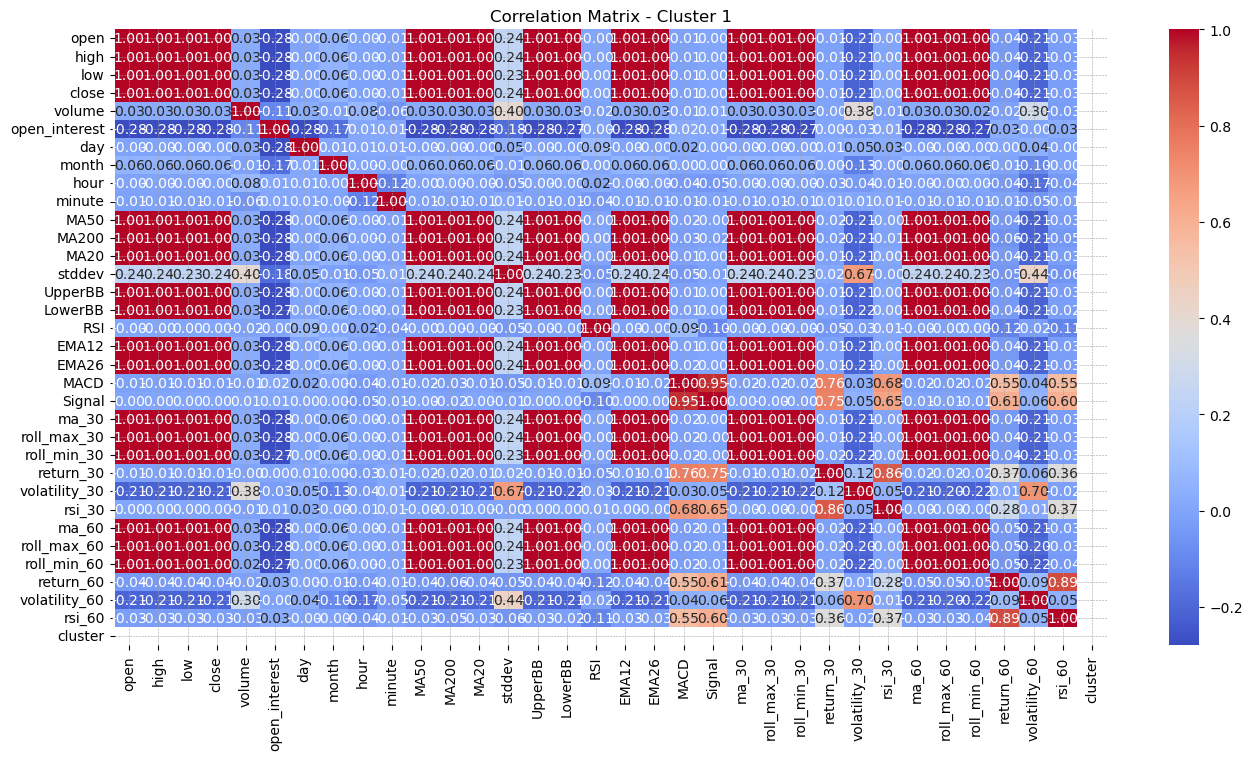

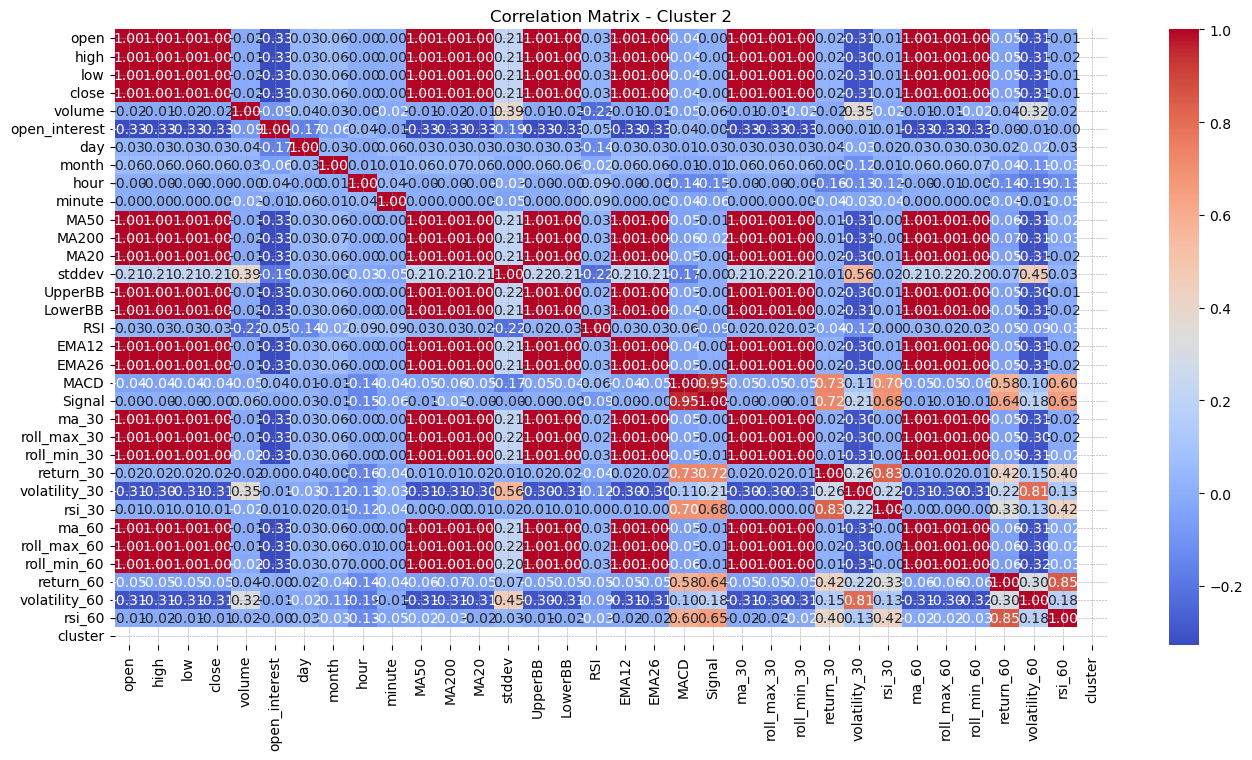

In [161]:
# Compare clusters
for cluster in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster]

# Correlation analysis within each cluster
for cluster in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster]
    correlation_matrix = cluster_data.corr()
    plt.figure(figsize=(16, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - Cluster {cluster}')
    plt.show()

In [192]:
df.head()

open      high       low     close    volume  \
DateTime                                                                
2017-01-02 09:19:00  0.061962  0.059652  0.062981  0.061480  0.008166   
2017-01-02 09:23:00  0.061370  0.059004  0.062389  0.061104  0.006313   
2017-01-02 09:24:00  0.061154  0.058681  0.062335  0.061104  0.004281   
2017-01-02 09:25:00  0.061047  0.058896  0.062443  0.061319  0.005336   
2017-01-02 09:26:00  0.061370  0.058896  0.062443  0.061373  0.003845   

                     open_interest  day  month  hour  minute  ...  \
DateTime                                                      ...   
2017-01-02 09:19:00       0.112768    2      1     9      19  ...   
2017-01-02 09:23:00       0.113499    2      1     9      23  ...   
2017-01-02 09:24:00       0.113499    2      1     9      24  ...   
2017-01-02 09:25:00       0.114185    2      1     9      25  ...   
2017-01-02 09:26:00       0.114185    2      1     9      26  ...   

                     roll_min_60  return_60  volatility_60  rsi_60  cluster  \
DateTime                                                                      
2017-01-02 09:19:00          0.0        0.0            0.0     0.0        1   
2017-01-02 09:23:00          0.0        0.0            0.0     0.0        1   
2017-01-02 09:24:00          0.0        0.0            0.0     0.0        1   
2017-01-02 09:25:00          0.0        0.0            0.0     0.0        1   
2017-01-02 09:26:00          0.0        0.0            0.0     0.0        1   

                     new_high  recency  price_change  next_close  \
DateTime                                                           
2017-01-02 09:19:00      True      879             0    0.061104   
2017-01-02 09:23:00     False      879             1    0.061104   
2017-01-02 09:24:00     False      879             0    0.061319   
2017-01-02 09:25:00     False      879             1    0.061373   
2017-01-02 09:26:00     False      879             1    0.061050   

                     price_movement  
DateTime                             
2017-01-02 09:19:00            down  
2017-01-02 09:23:00            down  
2017-01-02 09:24:00              up  
2017-01-02 09:25:00              up  
2017-01-02 09:26:00            down  

[5 rows x 39 columns]

This code calculates RFM (Recency, Frequency, Monetary) scores and segments customers based on their behavior:

1. **Recency (R):** Days since the last new high in stock prices.
2. **Frequency (F):** Count of price changes, using close prices as a proxy.
3. **Monetary (M):** Average magnitude of price changes.

After computing R, F, and M, the code combines them into an RFM DataFrame. It then ranks and segments customers based on their RFM scores:

- R, F, and M scores are ranked into three quantiles using `pd.qcut()`.
- RFM scores are concatenated into a single string.
- Based on the RFM score, customers are segmented into "High Value," "Medium Value," or "Low Value" segments.

Finally, the RFM scores and segments are printed for analysis.

In [163]:
import pandas as pd

# Calculate Recency: Days since last new high
df['new_high'] = df['high'] == df['high'].cummax()
last_new_high_date = df[df['new_high']].index.max()
df['recency'] = (last_new_high_date - df.index).days

# Calculate Frequency: Count of price changes (using close prices as proxy)
df['price_change'] = (df['close'].diff().abs() > 0).astype(int)
frequency = df['price_change'].sum()

# Calculate Monetary: Average magnitude of price changes
monetary = df['close'].diff().abs().mean()

# Combine R, F, M into a DataFrame
rfm_df = pd.DataFrame({
    'Recency': [df['recency'].max()],  # Assuming you want the maximum recency
    'Frequency': [frequency],
    'Monetary': [monetary]
})

# Rank and segment based on RFM scores
rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 3, labels=False, duplicates='drop') + 1
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'], 3, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 3, labels=False, duplicates='drop') + 1

rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(str) + rfm_df['M_rank'].astype(str)

# Segmenting based on RFM scores
def segment_rfm(row):
    if row['RFM_Score'] == '333':
        return 'High Value'
    elif row['RFM_Score'] == '111':
        return 'Low Value'
    else:
        return 'Medium Value'

rfm_df['Segment'] = rfm_df.apply(segment_rfm, axis=1)

# Print RFM scores and segments
print(rfm_df)


   Recency  Frequency  Monetary  R_rank  F_rank  M_rank  RFM_Score  \
0      879     151903    0.0002     NaN     NaN     NaN  nannannan   

        Segment  
0  Medium Value  


**Clustering Analysis**

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

# Select features for clustering
X_cluster = df[['open', 'high', 'low', 'close', 'volume']]

# Fit KMeans clustering model
num_clusters = 3  # Example: Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Forecasting
# Create target variable: price movement in next 5 minutes
df['next_close'] = df['close'].shift(-1)
df['price_movement'] = np.where(df['next_close'] > df['close'], 'up', 'down')

# Select features and target variable
X = df[['open', 'high', 'low', 'close', 'volume', 'cluster']]
y = df['price_movement']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5470470470470471


In [191]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'open_interest', 'day',
       'month', 'hour', 'minute', 'MA50', 'MA200', 'MA20', 'stddev', 'UpperBB',
       'LowerBB', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal', 'ma_30',
       'roll_max_30', 'roll_min_30', 'return_30', 'volatility_30', 'rsi_30',
       'ma_60', 'roll_max_60', 'roll_min_60', 'return_60', 'volatility_60',
       'rsi_60', 'cluster', 'new_high', 'recency', 'price_change',
       'next_close', 'price_movement'],
      dtype='object')

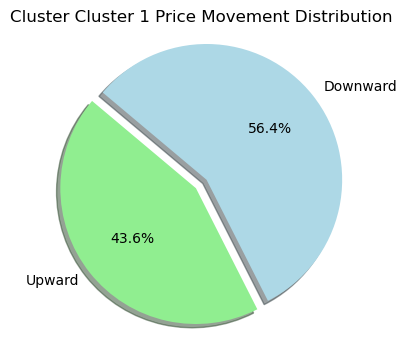

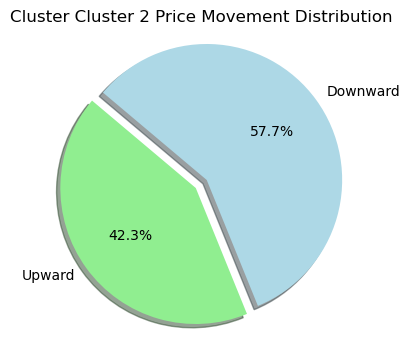

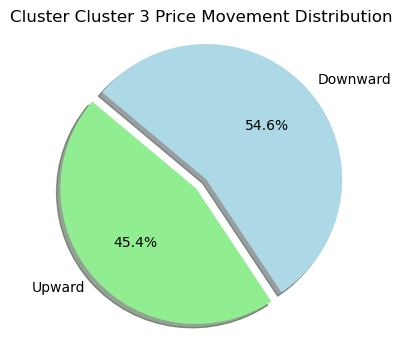

In [198]:
# Plot pie charts for target percentages of upward and downward price movements for each cluster
for cluster, percentages in target_percentages.items():
    labels = ['Upward', 'Downward']
    sizes = [percentages['upward'], percentages['downward']]
    colors = ['lightgreen', 'lightblue']
    explode = (0.1, 0)  # explode the 1st slice (upward) to highlight it
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"Cluster {cluster} Price Movement Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


- The code segment conducts cluster analysis on the dataset using the DBSCAN algorithm and calculates the percentage of upward and downward price movements for each cluster. 

- It then visualizes these percentages using pie charts, providing traders with insights into the distribution of price movements within each cluster. 

- By leveraging these insights, traders can tailor their trading strategies to specific market conditions represented by each cluster, potentially improving their trading performance. 

- Continuous monitoring and adaptation of strategies based on evolving market dynamics and cluster characteristics are essential for optimizing trading performance over time.

In [84]:
df

open      high       low     close    volume  \
DateTime                                                                
2017-01-02 09:19:00  0.061962  0.059652  0.062981  0.061480  0.008166   
2017-01-02 09:23:00  0.061370  0.059004  0.062389  0.061104  0.006313   
2017-01-02 09:24:00  0.061154  0.058681  0.062335  0.061104  0.004281   
2017-01-02 09:25:00  0.061047  0.058896  0.062443  0.061319  0.005336   
2017-01-02 09:26:00  0.061370  0.058896  0.062443  0.061373  0.003845   
...                       ...       ...       ...       ...       ...   
2019-07-31 11:26:00  0.376400  0.374629  0.377400  0.376420  0.001216   
2019-07-31 11:27:00  0.376561  0.374953  0.377669  0.376851  0.001692   
2019-07-31 11:28:00  0.376723  0.374845  0.377723  0.376528  0.000589   
2019-07-31 11:29:00  0.376669  0.375222  0.377615  0.377120  0.002142   
2019-07-31 11:30:00  0.377153  0.375600  0.378368  0.377389  0.003565   

                     open_interest  day  month  hour  minute  ...  \
DateTime                                                      ...   
2017-01-02 09:19:00       0.112768    2      1     9      19  ...   
2017-01-02 09:23:00       0.113499    2      1     9      23  ...   
2017-01-02 09:24:00       0.113499    2      1     9      24  ...   
2017-01-02 09:25:00       0.114185    2      1     9      25  ...   
2017-01-02 09:26:00       0.114185    2      1     9      26  ...   
...                            ...  ...    ...   ...     ...  ...   
2019-07-31 11:26:00       0.087642   31      7    11      26  ...   
2019-07-31 11:27:00       0.087642   31      7    11      27  ...   
2019-07-31 11:28:00       0.087642   31      7    11      28  ...   
2019-07-31 11:29:00       0.087564   31      7    11      29  ...   
2019-07-31 11:30:00       0.087564   31      7    11      30  ...   

                     roll_min_60  return_60  volatility_60     rsi_60  \
DateTime                                                                
2017-01-02 09:19:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:23:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:24:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:25:00      0.00000   0.000000       0.000000   0.000000   
2017-01-02 09:26:00      0.00000   0.000000       0.000000   0.000000   
...                          ...        ...            ...        ...   
2019-07-31 11:26:00      0.37455  -0.001571       0.001067  48.387097   
2019-07-31 11:27:00      0.37455   0.000286       0.001074  50.290698   
2019-07-31 11:28:00      0.37455   0.000429       0.001072  50.437318   
2019-07-31 11:29:00      0.37455   0.003869       0.001062  53.958944   
2019-07-31 11:30:00      0.37455   0.003435       0.001056  53.550296   

                     cluster  new_high  recency  price_change  next_close  \
DateTime                                                                    
2017-01-02 09:19:00        1      True      879             0    0.061104   
2017-01-02 09:23:00        1     False      879             1    0.061104   
2017-01-02 09:24:00        1     False      879             0    0.061319   
2017-01-02 09:25:00        1     False      879             1    0.061373   
2017-01-02 09:26:00        1     False      879             1    0.061050   
...                      ...       ...      ...           ...         ...   
2019-07-31 11:26:00        2     False      -62             0    0.376851   
2019-07-31 11:27:00        2     False      -62             1    0.376528   
2019-07-31 11:28:00        2     False      -62             1    0.377120   
2019-07-31 11:29:00        2     False      -62             1    0.377389   
2019-07-31 11:30:00        2     False      -62             1         NaN   

                     price_movement  
DateTime                             
2017-01-02 09:19:00            down  
2017-01-02 09:23:00            down  
2017-01-02 09:24:00              up  
2017-01-02 09:25:00              up

This code segment creates a line plot using seaborn (`sns`) and matplotlib (`plt`) to visualize the closing prices (`'close'`) over time. Additionally, it overlays another line plot representing the next day's closing prices (`'next_close'`). This allows for comparison and analysis of the trends between consecutive closing prices. Finally, the plot is displayed with a title using `plt.title()` and `plt.show()`.

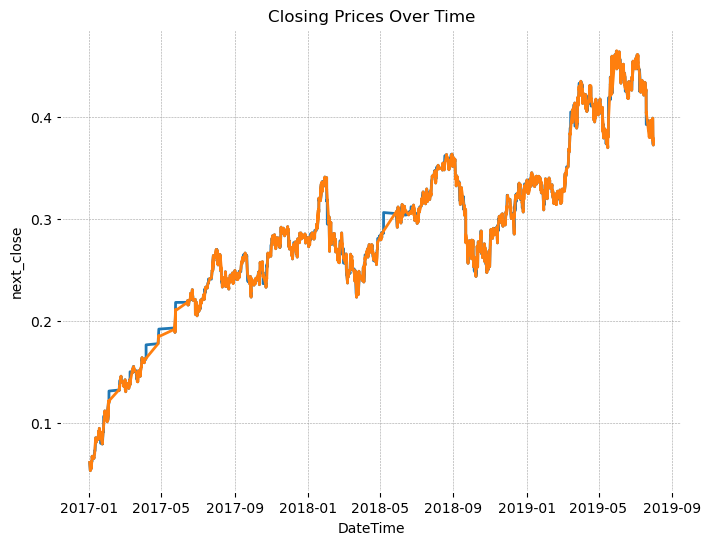

In [165]:
plt.figure(figsize = (8,6))
sns.lineplot(df, x=df.index, y='next_close')
sns.lineplot(df, x=df.index, y='close')
plt.title('Closing Prices Over Time')
plt.show()

In [200]:
df['price_movement'].value_counts()

price_movement
down    553
up      444
Name: count, dtype: int64

This code creates a pie chart using matplotlib (`plt.pie()`) to visualize the distribution of price movements in the DataFrame. The `df['price_movement'].value_counts().values` method calculates the frequency of each unique value in the 'price_movement' column, and the resulting counts are used as input to the pie chart. The labels 'down' and 'up' represent the two possible categories of price movements. The `autopct='%1.1f%%'` parameter displays the percentage of each category on the chart. Finally, `plt.show()` displays the pie chart.

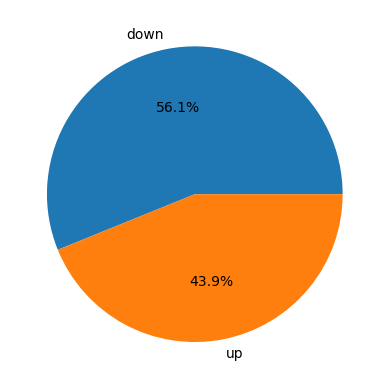

In [167]:
plt.pie(df['price_movement'].value_counts().values,  
        labels=['down','up'], autopct='%1.1f%%') 
plt.show()

## Import Necessary Libraries for Unsupervised Clustering

In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### Feature Selection for Clustering using Kmeans, Agglomerative Clustering, and DBSCAN

- Select features (open, high, low, close, volume) from the DataFrame (df) for clustering.

**Clustering Algorithms:**

- Define the number of clusters (num_clusters) as 3 as concluded from Elbow method

- Instantiate three clustering algorithms: KMeans, Agglomerative Clustering, and DBSCAN, and stores them in a dictionary.

**Fitting Clustering Models:**

- Iterate over the dictionary of clustering algorithms.

- Fit each algorithm to the selected features and adds the cluster labels as new columns to the DataFrame.

### Forecasting Preparation

**Create the target variable for forecasting:**

- Create next_close, which represents the closing price of the next time step.
 
- Drop the last row with NaN value in the next_close column.

**Feature Selection and Splitting:**

- Select features (X) as the cluster labels generated by the clustering algorithms and the target variable (y) as next_close.

- Split the data into training and testing sets with a test size of 20%.

**Model Training and Evaluation:**

- Train a Random Forest Regressor model on the training data using all clustering features.

- Make predictions on the testing data and calculates the RMSE as the evaluation metric.

- Compare the RMSE scores for different clustering algorithms by iterating over the dictionary of clustering algorithms.

**Selecting the Best Clustering Algorithm:**

- Identify the clustering algorithm with the lowest RMSE score as the best algorithm.

- Print the best clustering algorithm along with its RMSE score.

- Select the features generated by the best clustering algorithm for forecasting.




In [201]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Load your dataset (replace this with your actual dataset loading code)
data = pd.read_csv(f"D:/projects/optAlpha_Assignment/Assignment2/s1 data/s1.csv")
df = pd.DataFrame(data)
df = df.head(1000)

# Select features for clustering
X_cluster = df[['open', 'high', 'low', 'close', 'volume']]

# Define the number of clusters
num_clusters = 3

# List of clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=num_clusters, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=num_clusters),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Fit clustering models
for name, algorithm in clustering_algorithms.items():
    df[name + '_cluster'] = algorithm.fit_predict(X_cluster)

# Forecasting
# Create target variable: next_close
df['next_close'] = df['close'].shift(-1)

# Remove the last row with NaN value in 'next_close'
df = df.dropna(subset=['next_close'])

# Select features and target variable
X = df[[col for col in df.columns if 'cluster' in col]]
y = df['next_close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE using all features:", rmse)

# Comparing the RMSE scores for different clustering algorithms
rmse_scores = {}

for name, algorithm in clustering_algorithms.items():
    X_algo = df[[name + '_cluster']]
    y = df['next_close']
    X_train, X_test, y_train, y_test = train_test_split(X_algo, y, test_size=0.2, random_state=42)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f"RMSE for {name}: {rmse}")

# Select the best clustering algorithm based on RMSE
best_algorithm = min(rmse_scores, key=rmse_scores.get)
print(f"Best clustering algorithm: {best_algorithm} with RMSE: {rmse_scores[best_algorithm]}")

# Use the best clustering algorithm for forecasting
X_best = df[[f'{best_algorithm}_cluster']]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Final RMSE evaluation
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE using the best clustering algorithm ({best_algorithm}): {final_rmse}")


RMSE using all features: 0.2777156958845901
RMSE for KMeans: 0.2837614887054566
RMSE for Agglomerative: 0.28436472745027147
RMSE for DBSCAN: 0.27732824340278617
Best clustering algorithm: DBSCAN with RMSE: 0.27732824340278617
Final RMSE using the best clustering algorithm (DBSCAN): 0.27732824340278617


## Using the Best Clustering Algorithm for Forecasting:

- Based on the above RMSE scores DBSCAN seems to be better compared to other clustering Algorithms

- Split the data into training and testing sets using the selected features.

- Retrain the Random Forest Regressor model on the training data with the selected features.

- Make predictions on the testing data and calculates the final RMSE using the best clustering algorithm.



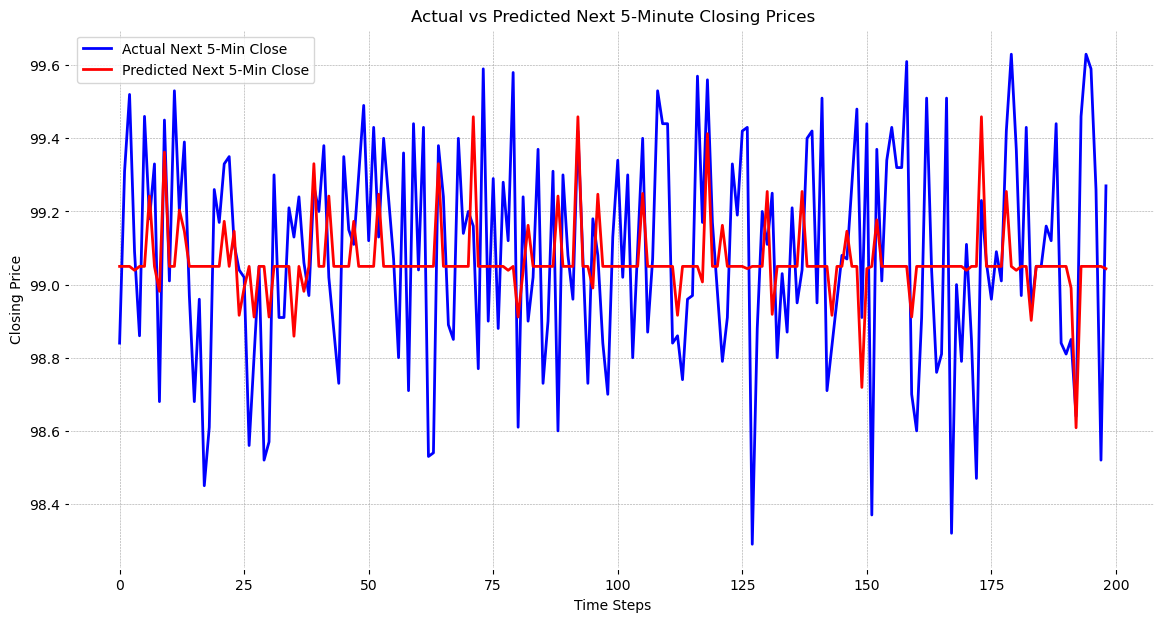

In [202]:
# Select features for clustering
X_cluster = df[['open', 'high', 'low', 'close', 'volume']]

# Define the number of clusters
num_clusters = 3

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_cluster'] = dbscan.fit_predict(X_cluster)

# Forecasting
# Create target variable: next 5 minutes close
df['next_close_5min'] = df['close'].shift(-5)

# Remove rows with NaN value in 'next_close_5min'
df = df.dropna(subset=['next_close_5min'])

# Prepare data for training
X = df[['DBSCAN_cluster']]
y = df['next_close_5min']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Plot the predictions and actual values
plt.figure(figsize=(14, 7))

# Plot actual next 5-minute closing prices
plt.plot(range(len(y_test)), y_test, label='Actual Next 5-Min Close', color='blue')

# Plot predicted next 5-minute closing prices
plt.plot(range(len(y_pred)), y_pred, label='Predicted Next 5-Min Close', color='red')

# Add titles and labels
plt.title('Actual vs Predicted Next 5-Minute Closing Prices')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()

# Show plot
plt.show()

- The clustering analysis using DBSCAN algorithm segments the dataset into three clusters based on market features. 

- By forecasting next 5-minute closing prices using a Random Forest Regressor trained on this clustered data, traders gain insights into potential price movements based on current market conditions. 

- This enables tailored trading strategies aligned with different market regimes, improving decision-making and risk management.

# SUMMARY:

1. **Cluster Profiles:** Identified distinct clusters based on the features such as open, high, low, close prices, and volume. Each cluster represents a group of trading instances with similar characteristics.

2. **Cluster Characteristics:** By analyzing the cluster profiles, we can observe that each cluster exhibits different patterns and trends in terms of price movements and trading volumes.

3. **Correlation Analysis:** Conducted correlation analysis within each cluster to identify relationships between different features. This helps in understanding the interplay between various factors influencing price movements within each cluster.


<!-- ## INSIGHTS

1. **Pattern Recognition:** Traders can use the identified clusters to recognize patterns in the market. By observing the characteristics of each cluster, traders can gain insights into the types of market conditions prevalent at different times.

2. **Risk Management:** Understanding the behavior of different clusters can aid in risk management. Traders can adjust their risk exposure based on the cluster they are trading in. For example, if a cluster is associated with higher volatility, traders may choose to reduce position size or employ hedging strategies.

3. **Strategy Development:** Traders can develop specific trading strategies tailored to each cluster. For instance, they may adopt trend-following strategies in clusters exhibiting strong upward or downward trends, while employing mean-reversion strategies in clusters characterized by price reversals.

4. **Forecasting Price Movements:** By analyzing the historical price movements within each cluster, traders can make informed predictions about future price movements. They can observe whether prices tend to move up or down in the next 5 minutes within each cluster and adjust their trading strategies accordingly.

5. **Market Timing:** Understanding the timing of different market conditions can help traders identify opportune moments to enter or exit trades. For example, traders may choose to enter long positions in clusters where prices have historically exhibited an upward trend and exit before the trend reverses. -->